<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# ***Who Is More Likely To Use Mobile Money?***

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Workflow](#3.2-Workflow)
    - [3.3 Methods](#3.3-Methods)
    - [3.4Analysis](#3.4-Analysis)
    - [3.5 Results](#3.5-Results)
- [4. Implementation (optional)](#4.-Implementation-(optional))
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract 

With mobile money rapidly expanding from its original role as a payment service to a platform for customers to gain access to a broader array of financial services, the survival prospects for traditional banks, mico-lenders and other traditional financial service providers will greately depend not only on their ability to effectively target the financially excluded, but also to enter into strategic partnerships with telecom operators and identify individuals on the mobile network who are most likely to use financial products and services (i.e. savings, credit, insurance) in addition to mobile money.  In this project, I apply machine learning to induce a model to classify an individual into one of four categories based on mobile money and financial service use.  I test the approach using Support Vector Machines, Logistic Regression and Random Forest classifiers and evaluate their performance on a dataset containing socio-economic and demographic information on approximately 7,100 individuals across Tanzania.  The models identify the key drivers of mobile money and financial service use as frequency and recency of financial transactions, mobile phone ownership, regional location and the level of education achieved.  The best model has an overall accuracy of 67.2%.  These results demonstrate the potential for the use of machine learning to refine customer targeting and cross-selling strategies.

## Introduction

The rapid expansion of digital financial services in Sub Saharan Africa ('SSA') over the past decade has presented enormous challenges and opportunities for banks, micro-lenders, mobile network operators ('MNO's), payment service providers ('PSP's), governments and a host of other stakeholders in the financial ecosystem.  

With unique mobile susbcriptions and mobile internet use in SSA projected to reach penetration rates of 50% and 39% respectively by 2025 (up from 44% and 23% in 2018)<sup>1</sup> and with the number of mobile money accounts surpassing formal bank accounts in 2019<sup>2</sup> further disruption in the financial landscape is assured.

The business case for increased digitial finance is well documented: for MNOs, digital financial product offerings increase customer satisfaction and reduce churn; for banks, routing transactions through digital channels reduces cost-to-income ratios and a broader customer footprint boosts low-cost deposit mobilization<sup>3</sup>; for governments, mobile money is being increasingly deployed for social policy priorities such as government-to-person ('G2P') transfers.

As mobile money expands from its traditonal role as a payment service to a gateway for millions to gain access to a broader array of financial services such as savings, insurance, credit and investment products<sup>4</sup> the survival prospects for banks, insurance companies, mico-lenders and other traditional financial service providers will greately depend not only on their ability to target the 'unbanked', but also to partner with telecom operators and identify individuals on the mobile network who are most likely to use financial products and services in addition to mobile money.

The goal of this project was to explore the application of machine learning to the problem of predicting the level of financial inclusion of an individual based on a set of socio-economic, demographic and other attributes. Tackling this problem involved a number of steps.

The first step was to frame the underlying decision problem as a classification problem where the target to be predicted was the level of financial inclusion of an individual. I then formulated an overall business hypotheses to test: *'Do demographic and socio-economic drivers exist that make it more (or less) likely that an individual will use mobile money and other financial services?'*. 

The next step involved obtaining a dataset with which to test the hypothesis empirically.  A dataset containing socio-economic and demographic information and the types of financial services used by approximately 7,100 individuals across Tanzania and a geospatial mapping of all financial access points was made available for use by Zindi, an African datascience competition platform based in South Africa.  To add spatial context, the capabilities of Esri’s ArcGIS Technology and The Africa GeoPortal were used.

Exploratory data analysis ('EDA') was performed iteratively to collect, plot, filter, cleanse, and combine variables in the dataset to compare differences and examine relationships between the input features themselves and between the input features and the target variable and to test a series of hypotheses about the functional form of the mapping function between the socio-economic and demographic attributes of an individual and their level of financial inclusion. Statistical measures such as t-tests and correlations were used to test alternate theories about these relationships. The next step involved defining accuracy score, precision, recall and other measures as the metrics to be used to either accept or reject our overall hypothesis.  

Once the data was cleaned, candidate classification algorithms were selected based on the size, dimensionality and other attributes of the data and then trained.  The performance of each of the models was then assessed using a k-fold cross validation strategy.  Next, several techniques including recursive feature eliminiation were used to infer the key drivers of the level of financial inclusion of an individual.  Systematic hyper-parameter tuning was then performed to examine the effects on generalization, particulary with unbalanced data.  The final step was to report on the relative performance of the models and systematic weaknesses and outline next steps. Here is a flow chart that describes the process:

![alt text](Project_Flow.jpg "Project Flow")

## 1. The problem

As mobile money evolves from a payment service to a gateway for customers to gain access to a broader array of financial services, the survival prospects for MNOs in Tanzania and the financial services providers (banks, insurance companies) that have entered into **strategic partnerships** with them will greatly depend on their ability to cross-sell financial products and services (savings, credit, insurance) to existing mobile network subscribers efficiently.

The goal is to determine whether machine learning can be used to tackle the problem of accurately classifying individuals on a mobile network based on the likelihood that they will use mobile money and financial services.  If it can be shown that the models induced using machine learning are effective, financial services providers and MNOs can use the model's predictions to more accurate decisions on which individuals on the mobile network to target for **upselling**, **cross-selling** and other **marketing strategies**.

In this project, the problem involves using machine learning to induce models to classify individuals into one of four mutually exclusive categories based on socio-economic and demographic features associated with each individual, a geospatial mapping of financial access points and other spatial and demographic information.  

This is an example of **supervised learning** which relates to systems where you have a vector of input variables $x$ and an output variable $Y$, and you use an algorithm to estimate the true a mapping function $f(x)$ from the input variables to the output.  In cases such as this where the outcome variable $Y$ is categorical the prediction problem is a problem of **classification**.  Where $Y$ takes on more than two values the prediction task is termed **multi-class classification**.

I will test my hypotheses on a dataset that contains socio-economic and demographic information and the types of financial services that are used by approximately 7,000 individuals across Tanzania. The data was extracted from the Financial Sector Deepening Tanzania ('FSDT') Finscope 2017 survey and was prepared for the Mobile Money and Financial Inclusion in Tanzania Challenge in 2019. Permission to use the dataset was provided by Zindi, an African datascience competition platform based in South Africa. 

The types of financial services used by individuals in the dataset were grouped into four mutually exclusive categories:

1. **No_financial_services:** Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
2. **Other_only:** Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
3. **Mm_only:** Individuals who use mobile money only
4. **Mm_plus:** Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

Socio-economic and demographic information on each individual is described in 32 distinct categorical feature variables.  

A geospatial mapping of all financial access points in Tanzania in 2012 ('FinAccess Map') will be used to enrich the individual survey data.  Financial access points include commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT and was also made available by Zindi.  In order to add spatial context, the capabilities of Esri’s ArcGIS Technology and The Africa GeoPortal will also be used.

More formally, the problem can be stated as follows, if $Y$ takes on a total of 4 distinct values as in this case, the expectation of $Y$ given the vector of input variables $x$ is the posterior probability that $Y$ lies in any one of the four categories given the value of $x$.  So the problem is to induce a model that assigns an individual to a particular category **if** the model's estimate of the posterior probability of membership in that category **exceeds** the estimated posterior probabilities of membership in each of the other 3 categories.


[Back to top](#Table-of-contents)

## 2. Purpose of the study

My firm provides supply chain finance solutions to MNOs and their network installation and maintenance partners in Kenya, Tanzania and Malawi, so I have a keen interest in the growth of mobile technology, including fintech, in Africa.  Recently, MNOs in the region have begun to prioritize seeking ways to unlock value from their vast troves of subscriber data.  A few have developed algorithmic digital lending products that have been phenomenally successful, such as Safaricom's M-Shwari and Fuliza products. This project is exciting because it is relevant to my part of the world and it will be a great way for me to acquire the skills I will need to be able to add advanced data analytics to my company's product suite.


[Back to top](#Table-of-contents)

## 3. Project description

Only 16.7% of the population in Tanzanian has or uses formal banking services.  An additional 55% do not have a bank account use other formal financial services, including mobile money.  The remaining 28% of the population is financially excluded.  63% of adult Tanzanians own a mobile phone<sup>5</sup>  A key business challenge for MNOs and other financial service providers in Tanzania is to find effective ways to grow and retain markets within this set of parameters and myriad other business constraints. In this project we will explore the use of machine learning to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance) in Tanzania.  The results will help MNOs and financial service providers make better business decisions on which individuals to target for **upselling**, **cross-selling**, **churn reduction** and other **marketing strategies**.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis


A key goal of the project is to establish whether or not demographic and socio-economic drivers exist that make it more or less likely that an individual will use mobile money and other financial services.  

A related question with important business implications is whether it is possible to use those characteristics to induce a model that can accurately predict the likelihood that an individual will use mobile money and other financial services.

If the above hypotheses are true, then it is possible for financial services providers to use predictions obtained from the induced model for consumer targeting.

In the predictive modeling context, the likelihood that an individual will use financial services in addition to mobile money can be represented as a response variable $Y$ and certain demographic and socio-economic characteristics associated with that individual, such as income, mobile phone ownership and level of formal education can be represented in terms of explanatory variables or features $x_1$, $x_2$ and $x_3$. The functional relationship between the response and the features can then be expressed as:

$Y$ = $\beta_0$ + $\beta_0$$x_1$ + $\beta_0$$x_2$ + $\beta_0$$x_3$ + $e$

where the $\beta_i$ is slope parameter in the functional relationship between the expectation of $Y$ and $x_i$ and $e$ is an error term that can be thought of as factors other than income level, mobile phone ownership and education that affect the likelihood of mobile money and financial services use.

A null hypothesis that income level, mobile phone ownership and level of formal education have **no effect** on the expected likelihood of the response can be formally stated as follows:

$H_0:$   $\beta_1$ = $\beta_2$ = $\beta_3$ = 0

The null hypothesis is either accepted or rejected empirically.

[Back to top](#Table-of-contents)

### 3.2 Workflow

- **Define the problem** 

As mobile money evolves from a payment service to a gateway for millions to gain access to a broader array of financial services, the survival prospects for traditional financial services providers (banks, insurance companies) in Tanzania will greatly depend on their ability to form **strategic partnerships** MNOs and to cross-sell their financial products and services (savings, credit, insurance) to existing mobile network subscribers efficiently.

The goal is to determine whether machine learning can be used to tackle the problem of accurately classifying individuals on a mobile network based on the likelihood that they will use mobile money and financial services.  If it can be shown that the models induced using machine learning are effective, financial services providers and MNOs can use the model's predictions to make more accurate decisions on which individuals on the mobile network to target for **upselling**, **cross-selling** and other **marketing strategies**.

In this project, the aim is to use machine learning to induce models to classify individuals into one of four mutually exclusive categories based on socio-economic and demographic features associated with each individual, a geospatial mapping of financial access points and other spatial and demographic information.  

This is an example of **supervised learning** which relates to systems where you have a vector of input variables $x$ and an output variable $Y$, and you use an algorithm to induce a mapping function from the input variables to the output.  In cases such as this where the outcome variable $Y$ is categorical the prediction problem is a problem of **classification**.  Where $Y$ takes on more than two values the prediction task is termed **multi-class classification**.

My hypotheses will be tested on a dataset that contains socio-economic and demographic information and the types of financial services that are used by approximately 7,100 individuals across Tanzania. The data was extracted from the Financial Sector Deepening Tanzania ('FSDT') Finscope 2017 survey and was prepared for the Mobile Money and Financial Inclusion in Tanzania Challenge in 2019. Permission to use the dataset was provided by Zindi, an African datascience competition platform based in South Africa.

The types of financial services used by individuals in the dataset were grouped into four mutually exclusive categories:

1. **No_financial_services:** Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
2. **Other_only:** Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
3. **Mm_only:** Individuals who use mobile money only
4. **Mm_plus:** Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

Socio-economic and demographic information on each individual is described in 32 distinct categorical feature variables.  

A geospatial mapping of all financial access points in Tanzania in 2012 ('FinAccess Map') will be used enrich the individual survey data.  Financial access points include commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT and was also made available by Zindi.  In order to add spatial context, the capabilities of Esri’s ArcGIS Technology and The Africa GeoPortal will also be used.

More formally, if $Y$ takes on a total of 4 distinct values as in this case, the expectation of $Y$ given the vector of input variables $x$ is the posterior probability that $Y$ lies in any one of the four categories given the value of $x$.  So the problem is to use machine learning algorithm to induce a model that assigns an individual to a particular category if the model's estimate of the posterior probability of membership in that category exceeds the estimated posterior probabilities of membership in each of the other 3 categories.

- **Map the system** 

As stated above, the likelihood that an individual will use mobile money and other financial services can be represented as a response variable $Y$ and the demographic and socio-economic characteristics associated with that individual, information from the FinAccess Map and contextual demographic layers of Africa Geoportal can be represented in terms of explanatory variables or features $x_1$, $x_2$ , ... , $x_k$ so that the **true relationship** between the response and the feature vector $x$ can be expressed as:

$Y$ = $f(x)$ + $e$

where the $\beta$ is a slope vector in the functional relationship between the expectation of $Y$ and feature vector $x$ and $e$ is an error term that can be thought of as factors other than those represented by the feature vector $x$ that affect the likelihood of mobile money and financial services use.

In **section 3.4** below I will use exploratory data analysis (**'EDA'**) to collect, plot, filter, cleanse, and combine variables in our survey dataset, the FinAccess Map and the Africa Geoportal to compare differences and examine relationships between the features themselves and between the features and the output variable to enable me to **hypothesize the functional form** of the **true function** $f(x)$.  Statistical measures such as t-tests and correlations will be used to **test alternate theories** about these relationships. This will be an **iterative** process.

- **Define suitable metrics**

In **section 3.5** below I will select suitable metrics that are appropriate for **multi-class classification** problems and have been used for similar tasks.  These metrics will include **accuracy score**, **confusion matrices** (precision, recall, class prediction error) and the **ZeroR** benchmark.  I will fine tune the selection of performance measures depending on whether the distribution of outcome labels is **balanced** or **imbalanced**. Where appropriate, I will formulate tests such as **confidence intervals** and **two-sample t-tests** for significance of the comparative performance of the models.

Next, I will define appropriate metrics to test for the significance of model features.  This will involve a comparison between **feature importances** schemes, algorithms such as **recursive feature eliminiation** (**'RFE'**) and and an examination of **parameter weights** (for models such as Support Vector Machines where the weights are interpretable).  

- **Select modeling tools** 

The appropriateness of different models based on the task at hand, **multi-class classification**, taking into account other parameters such as size, shape and other characteristics of the data, training speed and deployment speed.

- **Implement model**  

Once the training data is cleaned the necessary libraries will be imported to build the models.

- **Evaluate model** 

To ensure that any results obtained do not depend on any given random choice affecting the pair of our training and validation set I will run a **K-fold cross-validation** for each one of the models implemented above to evaluate comparative performance.  Appropriate metrics will be used to evaluate model performance, namely **accuracy score**, **confusion matrices** (precision, recall, class prediction error) and the **zero rule**.  I will fine tune the selection of metrics depending on whether the distribution of outcome labels is **balanced** or **imbalanced** and run tests for the statistical significance of the comparative performance of the models.  Tune hyperparameters on the winning model(s) will be performed using **gridsearch**.

[Back to top](#Table-of-contents)

### 3.3 Methods

There are a large number of machine learning algorithms that can be applied to multi-class classification problems, including neural networks, genetic algorithms and decision trees.  
 
Our training data contains 7,000 samples.  **Support Vector Machines**, **Decision Tree Classifiers**, **Random Forest Classifiers**, **k-Nearest-Neigbours**, **Gaussian Naive Bayes** and **Logistic Regression** are all widely used for problems with similar parameters.  Support Vector Machines have the advantage that they can handle large numbers of features.
 
All of these classifiers are supported by Scikit-learn's libraries as **'inherently multi-class'**.  We will explore their relative performance in predicting financial service use.

[Back to top](#Table-of-contents)

### 3.4 Analysis 

[Back to top](#Table-of-contents)

Import the necessary libraries.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from geopy.geocoders import Nominatim
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geocoding import reverse_geocode
from arcgis.geometry import Point
from arcgis.features import FeatureLayer
from IPython.display import display
import requests
from scipy import stats
import statistics

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

from sklearn import svm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

Read the data

In [3]:
df = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/training.csv')
df_bank = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/banks_for_upload_win.csv')
df_atm = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/atm_for_upload_win.csv')
df_sacco = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/sacco_for_upload_win.csv')
df_tppp = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/3rd_ppp_for_upload_win.csv',engine='python')
df_pos = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/pos_for_upload_win.csv')
df_mma = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv',engine='python')
df_bus = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/bus_stands_for_upload_win.csv')
df_mfi = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/microfinance_for_upload_win.csv')
df_post = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/post_office_for_upload_win.csv')
df_region = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/df_region.csv')
df_demographics = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/df_demographics.csv')

Rename the columns for easier analysis

In [4]:
df = df.rename(columns=
{
"Q1": "Age", 
"Q2": "Gender", 
"Q3": "Marital_Status", 
"Q4": "Educ", 
"Q5": "Rent_Own", 
"Q6": "Own_Other_Property",
"Q7": "Own_Mobile_Phone", 
"Q8_1": "Salaried_Worker", 
"Q8_2": "Trader", 
"Q8_3": "Service_Provider",
"Q8_4": "Casual_Worker", 
"Q8_5": "Earn_Rent",
"Q8_6": "Earn_Interest_Income", 
"Q8_7": "Earn_Pension", 
"Q8_8": "On_Welfare", 
"Q8_9": "Rely_On_Others", 
"Q8_10": "Expenses_Paid", 
"Q8_11": "Other", 
"Q9": "Employer_Type", 
"Q10": "Goods_Sold", 
"Q11": "Services_Provided", 
"Q12": "Sent_Money_12Mo", 
"Q13": "Last_Sent", 
"Q14": "Received_Money_12Mo", 
"Q15": "Last_Received", 
"Q16": "Goods_Purchase_Freq", 
"Q17": "Bills_Pay_Freq", 
"Q18": "Kiswahili", 
"Q19": "English",
"mobile_money_classification": "MM_Use"
})

In [5]:
df.columns

Index(['ID', 'Age', 'Gender', 'Marital_Status', 'Educ', 'Rent_Own',
       'Own_Other_Property', 'Own_Mobile_Phone', 'Salaried_Worker', 'Trader',
       'Service_Provider', 'Casual_Worker', 'Earn_Rent',
       'Earn_Interest_Income', 'Earn_Pension', 'On_Welfare', 'Rely_On_Others',
       'Expenses_Paid', 'Other', 'Employer_Type', 'Goods_Sold',
       'Services_Provided', 'Sent_Money_12Mo', 'Last_Sent',
       'Received_Money_12Mo', 'Last_Received', 'Goods_Purchase_Freq',
       'Bills_Pay_Freq', 'Kiswahili', 'English', 'Latitude', 'Longitude',
       'mobile_money', 'savings', 'borrowing', 'insurance', 'MM_Use'],
      dtype='object')

Inspect the data

In [35]:
df.head()

,ID,Age,Gender,Marital_Status,Educ,Rent_Own,Own_Other_Property,Own_Mobile_Phone,Salaried_Worker,Trader,...,Bills_Pay_Freq,Kiswahili,English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,MM_Use
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                      7094 non-null int64
Age                     7094 non-null int64
Gender                  7094 non-null int64
Marital_Status          7094 non-null int64
Educ                    7094 non-null int64
Rent_Own                7094 non-null int64
Own_Other_Property      7094 non-null int64
Own_Mobile_Phone        7094 non-null int64
Salaried_Worker         7094 non-null int64
Trader                  7094 non-null int64
Service_Provider        7094 non-null int64
Casual_Worker           7094 non-null int64
Earn_Rent               7094 non-null int64
Earn_Interest_Income    7094 non-null int64
Earn_Pension            7094 non-null int64
On_Welfare              7094 non-null int64
Rely_On_Others          7094 non-null int64
Expenses_Paid           7094 non-null int64
Other                   7094 non-null int64
Employer_Type           7094 non-null int64
Goods_Sold   

In [578]:
df.shape

(7094, 37)

No null entries in the dataset.

In [879]:
#df.isnull().sum()

Use **reverse geocoding** with **ArcGIS** to access respondents' 'Region' from their GPS coordinates.

Load the data in a dataframe 'df_region'. 

**N.B** It takes a **substantial amount of time** to extract 'Region' data for 7,100 respondents from ArcGIS servers.

So once it was uploaded, the 'Region' data was stored as a .csv file.  It is loaded from df_region.csv to the dataframe df_region using the script above.

In [8]:
gis = GIS()

df_region = pd.DataFrame()
error_list = []
index_list = []
address_list = []
latitude_list = []
longitude_list = []
for i in df.index:
#for i in range(370,380):
    try:
        address = reverse_geocode([df['Longitude'].iloc[i], df['Latitude'].iloc[i]])
        index_list.append(i)
        address_list.append(address['address']['Region'])
        latitude_list.append(df['Latitude'].iloc[i])
        longitude_list.append(df['Longitude'].iloc[i])
        error_list.append(0)
        #print(i,df['Latitude'].iloc[i],df['Longitude'].iloc[i])
    except Exception as e:
        #print("Alert", e, "occurred.")
        index_list.append(i)
        latitude_list.append(df['Latitude'].iloc[i])
        longitude_list.append(df['Longitude'].iloc[i])
        address_list.append(e)
        error_list.append(1)
df_region['Idx'] = pd.Series(index_list)
df_region['Region'] = pd.Series(address_list)
df_region['Lat_check'] = pd.Series(latitude_list)
df_region['Lon_check'] = pd.Series(longitude_list)
df_region['Error_List'] = pd.Series(error_list)

It takes a substantial amount of time to extract 'Region' data for 7,000 respondents from ArcGIS servers.

Store the df_region to a csv file for later use.

In [14]:
df_region.to_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/df_region.csv')

Insert the 'Region' column of df_region to the dataframe df.

In [12]:
#df_region['Region'].value_counts()

In [6]:
#df.columns

In [6]:
df.insert(32, 'Region', df_region['Region'])

In [7]:
df.columns

Index(['ID', 'Age', 'Gender', 'Marital_Status', 'Educ', 'Rent_Own',
       'Own_Other_Property', 'Own_Mobile_Phone', 'Salaried_Worker', 'Trader',
       'Service_Provider', 'Casual_Worker', 'Earn_Rent',
       'Earn_Interest_Income', 'Earn_Pension', 'On_Welfare', 'Rely_On_Others',
       'Expenses_Paid', 'Other', 'Employer_Type', 'Goods_Sold',
       'Services_Provided', 'Sent_Money_12Mo', 'Last_Sent',
       'Received_Money_12Mo', 'Last_Received', 'Goods_Purchase_Freq',
       'Bills_Pay_Freq', 'Kiswahili', 'English', 'Latitude', 'Longitude',
       'Region', 'mobile_money', 'savings', 'borrowing', 'insurance',
       'MM_Use'],
      dtype='object')

In [9]:
#df[df.isnull().any(axis=1)]

Load **demographic data** corresponding to respondents' **regional** locations from feature layers on **ArcGIS**.

The demographic data is **population density**, **purchasing power per capita** and **area** of 'Regions' in Tanzania.

Get the list of regions from the dataframe 'df_region'.  Store this information in a dataframe 'df_demographics'.

In [10]:
df_demographics = df_region.groupby(['Region']).mean()[['Idx']].reset_index()

In [11]:
df_demographics = df_demographics.drop(columns = 'Idx')


In [12]:
df_demographics.head(10)

,Region
0,Arusha
1,Cannot perform query. Invalid query parameters...
2,Dar es Salaam
3,Dodoma
4,Geita
5,Iringa
6,Kagera
7,Kaskazini Pemba
8,Kaskazini Unguja
9,Katavi


Connect to ArcGIS and load the demographic data to df_demographics.

In [13]:
referer = "https://arcgis.com"
username = 'geomuya'
password = '27869519muya'
tokenURL = referer + '/sharing/rest/generateToken'
params = {'f': 'pjson', 'username': username, 'password': password, 'referer': referer}
response = requests.request("POST", tokenURL, params=params)
data = response.json()
token = str(data['token'])

map_service = "https://demographics2.arcgis.com/arcgis/rest/services/TZA_Demographics_and_Boundaries/MapServer"
params = { "f": "json", "where":"1=1", "token":token }

url = map_service + '/query'
response = requests.request("GET", url=url , params=params)
data = response.json()

layers = data['layers']

density = []
area = []
pppc = []
region = []
idx = []
for i in df_demographics.index:
    try:
        queryParams  = { 'f': 'json', 'where': "NAME = '"+df_demographics['Region'].iloc[i]+"'", 'token': token, 'outFields': '*' }
        layer_2 = map_service +'/2/query'
        get_layer_2 = requests.request("GET", url=layer_2 , params=queryParams)
        layer_2_data = get_layer_2.json()
        idx.append(i)
        region.append(layer_2_data['features'][0]['attributes']['NAME'])
        area.append(layer_2_data['features'][0]['attributes']['AREA'])
        pppc.append(layer_2_data['features'][0]['attributes']['PPPC_CY'])
        density.append(layer_2_data['features'][0]['attributes']['POPDENS_CY'])
        #print(i)
    except IndexError as e:
        #print("Alert", e, "occurred.")
        idx.append(i)
        region.append(0)
        area.append(0)
        pppc.append(0)
        density.append(0)
    
df_demographics['demo_idx'] = pd.Series(idx)
df_demographics['region_check'] = pd.Series(region)
df_demographics['area'] = pd.Series(area)
df_demographics['purchasing_power'] = pd.Series(pppc)
df_demographics['density'] = pd.Series(density)

In [889]:
#df_demographics

Get the keys and values to create dictionaries to map each 'Region' to the 'Region's **area**, **purchasing power per capita**, and **population density**

In [14]:
demo_regions = df_demographics['Region']
demo_area = df_demographics['area']
demo_ppower = df_demographics['purchasing_power']
demo_popdensity = df_demographics['density']

In [15]:
area_mapping = {demo_regions[i]: demo_area[i] for i in range(len(demo_regions))} 
ppower_mapping = {demo_regions[i]: demo_ppower[i] for i in range(len(demo_regions))} 
popdensity_mapping = {demo_regions[i]: demo_popdensity[i] for i in range(len(demo_regions))}

Map area, purchasing power per capita and population density to new columns in the dataframe df

In [16]:
df['regional_area'] = df['Region'].map(area_mapping)
df['regional_ppower'] = df['Region'].map(ppower_mapping)
df['regional_popdensity'] = df['Region'].map(popdensity_mapping)

In [17]:
df.head()

,ID,Age,Gender,Marital_Status,Educ,Rent_Own,Own_Other_Property,Own_Mobile_Phone,Salaried_Worker,Trader,...,Longitude,Region,mobile_money,savings,borrowing,insurance,MM_Use,regional_area,regional_ppower,regional_popdensity
0,5086,98,2,3,1,1,2,2,0,0,...,29.811396,Kigoma,0,0,0,0,0,44372.373682,1029785.13,58.4
1,1258,40,1,1,3,5,1,1,1,0,...,39.244871,Mjini Magharibi,1,1,1,0,3,233.731054,2313256.01,3401.9
2,331,18,2,4,6,3,2,1,0,0,...,37.652798,Morogoro,1,0,0,0,2,69341.722231,1388675.87,38.8
3,6729,50,1,1,3,1,1,1,0,0,...,35.808307,Arusha,1,0,1,0,3,38096.252540,1681068.91,55.3
4,8671,34,1,1,1,1,2,1,0,1,...,31.039095,Rukwa,1,1,0,1,3,28566.091785,1104691.68,44.8


In [895]:
#df.Region.value_counts()

Store the demographic data to .csv for future use

In [46]:
df_demographics.to_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/df_demographics.csv')

Create a dataframe of the GIS locations of all **financial access points** (e.g. ATMs, bank branches, mobile money agents, third party payment providers, micro-lenders etc.)

Load the GIS coordinates for the financial access points

In [18]:
df_access_points = pd.DataFrame()
df_access_points['indiv_lat_long'] = pd.Series(df[['Latitude', 'Longitude']].apply(tuple, axis=1))
mma = df_mma[['latitude', 'longitude', 'region']]
bank = df_bank[['latitude', 'longitude', 'region']]
atm = df_atm[['latitude', 'longitude', 'region']]
sacco = df_sacco[['latitude', 'longitude','region']]
tppp = df_tppp[['latitude', 'longitude', 'region']]
pos = df_pos[['latitude', 'longitude', 'region']]
bus = df_bus[['latitude', 'longitude', 'region']]
mfi = df_mfi[['latitude', 'longitude', 'region']]
post = df_post[['latitude', 'longitude', 'region']]

Inspect the data

In [15]:
tppp.shape

(6900, 3)

In [19]:
tppp.head()

,latitude,longitude,region
0,-2.36921,33.57654,Mwanza
1,-2.53201,32.94780,Mwanza
2,-6.84188,39.21102,Dar es Salaam
3,-6.77949,39.24092,Dar es Salaam
4,-6.82792,39.31021,Dar es Salaam


Compute the minimum **Haversine** distance between each individual respondent and each type of financial access point.  
The dataset of coordinates of **mobile money agents** is quite large at **45 thousand** records; third-party payment providers has **6 thousand** records.  
The training set of respondents has **7 thousand** records.  
Use **vectorization** along with **numpy arrays** to optimize for computational speed.

In [20]:
def haversine(coord1, lat_2, lon_2):
    lat_1, lon_1 = coord1
    R = 6371
    lat_1, lon_1, lat_2, lon_2 = map(np.deg2rad, [lat_1, lon_1, lat_2, lon_2])
    dphi = lat_2 - lat_1 
    dlambda = lon_2 - lon_1 
    a = np.sin(dphi/2)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(dlambda/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_km = R * c
    return total_km

access_points = {'mma_dist': mma, 'bank_dist': bank, 'atm_dist': atm, 'sacco_dist': sacco, 'tppp_dist': tppp, 'pos_dist': pos, 'bus_dist': bus, 'mfi_dist': mfi, 'post_dist': post}  
indiv_list = []
indiv_list = df_access_points['indiv_lat_long']
for i, point_type in access_points.items():
    distance_list = []
    min_distance = []
    for j, val in np.ndenumerate(indiv_list): 
        distance_list = haversine(val,point_type.latitude.values,point_type.longitude.values)
        nearest = np.amin(distance_list)
        min_distance.append(nearest)
    df_access_points[i] = min_distance

In [21]:
df_access_points.head()

,indiv_lat_long,mma_dist,bank_dist,atm_dist,sacco_dist,tppp_dist,pos_dist,bus_dist,mfi_dist,post_dist
0,"(-4.46044192, 29.8113964)",3.245788,34.077154,50.664821,32.174329,34.086475,227.225120,34.230444,33.904747,33.654118
1,"(-6.17643812, 39.24487062)",1.292799,2.210803,2.207341,4.918423,2.363903,5.613890,66.022278,2.417876,4.512002
2,"(-6.82570215, 37.65279782)",0.122506,1.128424,1.084240,0.335244,0.288060,139.064094,120.888521,1.224672,0.541854
3,"(-3.37204916, 35.808307299999996)",0.031501,14.748761,6.268469,5.115917,5.143686,37.040948,170.276607,14.971460,5.176185
4,"(-7.17964514, 31.03909501)",7.665565,35.903198,35.885429,36.110567,250.102209,106.685663,297.744234,107.664933,93.087482


Concatenate distance to the nearest access point dataframe to df, and rename df as df_spatial

In [22]:
df_spatial = pd.concat([df,df_access_points], axis=1)

In [24]:
#df_spatial[df_spatial.isnull().any(axis=1)]

Compute the **Haversine** distance between each individual respondent and the **nearest regional capital**.

First, download the regional capitals from https://en.wikipedia.org/wiki/Regions_of_Tanzania.  Then, clean and curate the data for accuracy using ArcGIS basemaps for Tanzania.  Save to a .csv file then read the .csv file to dataframe df_capital.

Next, use **geocoding** with ArcGIS to load the coordinates of the capital cities of each region to df_capital.

In [25]:
gis = GIS()
df_capital = pd.read_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/capitals.csv')
lon_coords = []
lat_coords = []
error_list = []
for i in df_capital.index:
    try:
        lon_coords.append(list(geocode(str(df_capital['City'].iloc[i]))[0]['location'].values())[0])
        lat_coords.append(list(geocode(str(df_capital['City'].iloc[i]))[0]['location'].values())[1])
        error_list.append(0)
    except Exception as e:
        lon_coords.append(list(geocode(str(df_capital['City'].iloc[i]))[0]['location'].values())[0])
        lat_coords.append(list(geocode(str(df_capital['City'].iloc[i]))[0]['location'].values())[1])
        print("Alert", e, "occurred.")
        error_list.append(1)
df_capital['lat'] = lat_coords
df_capital['lon'] = lon_coords

Store df_capital to a .csv for later use

In [55]:
df_capital.to_csv('C:/Users/kibei/Desktop/DATA SCIENCE/Module 10/FSDT DATASET/FSDT_FinAccessMapping/df_capital.csv')

Inspect df_capital

In [26]:
df_capital.head(13)

,Region,City,lat,lon
0,Arusha Region,Arusha,-3.36981,36.68708
1,Dar es Salaam Region,Dar es Salaam,-6.81500,39.28671
2,Dodoma Region,Dodoma,-6.17350,35.74689
3,Geita Region,Geita,-2.87384,32.23102
4,Iringa Region,Iringa,-7.76924,35.68916
5,Kagera Region,Bukoba,-1.33636,31.81396
6,Pemba North Region,Wete,-5.05724,39.72864
7,Unguja North Region (Zanzibar),Mkokotoni,-5.87671,39.25467
8,Katavi Region,Mpanda,-6.35172,31.06997
9,Kigoma Region,Kigoma,-4.83927,29.67074


Remove the row corresponding to 'Region' **'Muchiga'** which doesn't exist

In [27]:
df_capital  = df_capital[df_capital.Region != 'Muchiga']

ArcGIS lat lon coordinates for **Koani** are wrong so we use **geopy** to get the correct coordinates for that city.

In [30]:
geolocator = Nominatim()
location = geolocator.geocode("Koani")

In [31]:
df_capital['lat'].loc[df_capital['City'] == 'Koani'] = location.latitude
df_capital['lon'].loc[df_capital['City'] == 'Koani'] = location.longitude

In [32]:
df_capital.head(13)

,Region,City,lat,lon
0,Arusha Region,Arusha,-3.369810,36.687080
1,Dar es Salaam Region,Dar es Salaam,-6.815000,39.286710
2,Dodoma Region,Dodoma,-6.173500,35.746890
3,Geita Region,Geita,-2.873840,32.231020
4,Iringa Region,Iringa,-7.769240,35.689160
5,Kagera Region,Bukoba,-1.336360,31.813960
6,Pemba North Region,Wete,-5.057240,39.728640
7,Unguja North Region (Zanzibar),Mkokotoni,-5.876710,39.254670
8,Katavi Region,Mpanda,-6.351720,31.069970
9,Kigoma Region,Kigoma,-4.839270,29.670740


Reset the index for df_capital

In [33]:
df_capital = df_capital.reset_index(drop = True)

In [31]:
#df_capital

Next, compute the distance from each individual to the nearest regional capital and store the values to dataframe df_min_city.

In [34]:
df_min_city = pd.DataFrame()
df_city = pd.DataFrame()
indiv_lat_lon = []
dist = []
city_lat = []
city_lon = []
city = []
df_city['city'] = df_capital['City'].values
for i in df_spatial.index: 
    df_city['dist'] = haversine(df_spatial.indiv_lat_long.iloc[i],df_capital.lat.values,df_capital.lon.values)
    df_city['city_lat'] = df_capital.lat.values 
    df_city['city_lon'] = df_capital.lon.values
    resp  = df_spatial.indiv_lat_long.iloc[i]
    d     = df_city[df_city.dist == df_city.dist.min()]['dist'].values
    c_lat = df_city[df_city.dist == df_city.dist.min()]['city_lat'].values
    c_lon = df_city[df_city.dist == df_city.dist.min()]['city_lon'].values
    c     = df_city[df_city.dist == df_city.dist.min()]['city'].values
    indiv_lat_lon.append(resp)
    dist.append(d)
    city_lat.append(c_lat)
    city_lon.append(c_lon)
    city.append(c)
df_min_city['indiv_lat_lon'] = indiv_lat_lon  
df_min_city['city_dist'] = [val for sublist in dist for val in sublist]
df_min_city['city_lat'] = [val for sublist in city_lat for val in sublist]
df_min_city['city_lon'] = [val for sublist in city_lon for val in sublist]
df_min_city['city'] = [val for sublist in city for val in sublist]

In [36]:
#df_min_city[df_min_city.isnull().any(axis=1)]

In [37]:
df_min_city.head()

,indiv_lat_lon,city_dist,city_lat,city_lon,city
0,"(-4.46044192, 29.8113964)",44.915710,-4.83927,29.67074,Kigoma
1,"(-6.17643812, 39.24487062)",5.372188,-6.16394,39.19793,Zanzibar City
2,"(-6.82570215, 37.65279782)",2.511113,-6.80518,37.66229,Morogoro
3,"(-3.37204916, 35.808307299999996)",93.256329,-4.20865,35.74924,Babati
4,"(-7.17964514, 31.03909501)",92.124178,-6.35172,31.06997,Mpanda


Create a new column in df_min_city with values "1" if the respondent lives within a 20km radius of nearest city and "0" otherwise.

Next, create another column identifying the name of the city.

In [38]:
df_min_city['20km_radius'] = df_min_city['city_dist'].apply(lambda x: 1 if x <= 20 else 0)
df_min_city['city_20km_radius'] = df_min_city.apply(lambda x: x['city'] if x['city_dist'] <= 20 else 0, axis= 'columns')

In [39]:
df_min_city = pd.concat([df_min_city,df_spatial.MM_Use], axis=1)

In [40]:
df_min_city.head()

,indiv_lat_lon,city_dist,city_lat,city_lon,city,20km_radius,city_20km_radius,MM_Use
0,"(-4.46044192, 29.8113964)",44.915710,-4.83927,29.67074,Kigoma,0,0,0
1,"(-6.17643812, 39.24487062)",5.372188,-6.16394,39.19793,Zanzibar City,1,Zanzibar City,3
2,"(-6.82570215, 37.65279782)",2.511113,-6.80518,37.66229,Morogoro,1,Morogoro,2
3,"(-3.37204916, 35.808307299999996)",93.256329,-4.20865,35.74924,Babati,0,0,3
4,"(-7.17964514, 31.03909501)",92.124178,-6.35172,31.06997,Mpanda,0,0,3


In [41]:
df_spatial = pd.concat([df_spatial, df_min_city.city_dist,df_min_city.city_20km_radius],axis='columns')

In [43]:
#df_spatial[df_spatial.isnull().any(axis=1)]

**Explore and visualize the data**

The target variable has four categories based on the types of financial services used by each respondent.  
The categories are mutually exclusive as each sample is assigned to one and only one category:  

**0: No_financial_services**: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance.  
**1: Other_only**: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)  
**2: Mm_only**: Individuals who use mobile money only  
**3: Mm_plus**: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)  

There are 47 feature variables, categorical and continuous.  

This is an example of a **multi-class classification**.

In [1581]:
#len(df_spatial.columns)

Plot the distribution of respondents in each financial service use category

Text(0, 0.5, 'Number of Respondents')

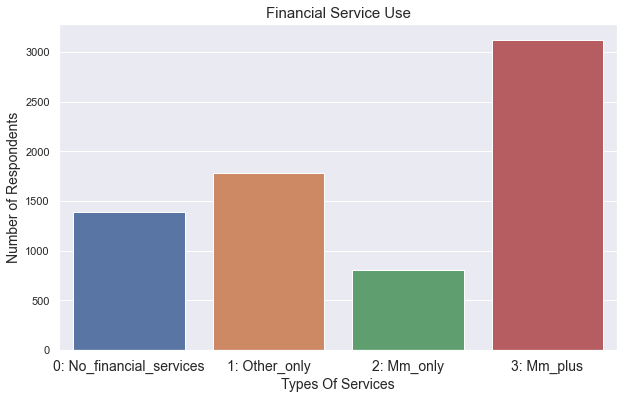

In [78]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 6)

a = sns.countplot(x = 'MM_Use', data=df_spatial, ax = ax)
a.set_title('Financial Service Use', fontsize=15)
a.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
a.set_xlabel("Types Of Services",fontsize=14)
a.set_ylabel("Number of Respondents",fontsize=14)

Plot the 'Gender' distribution and the relationship between gender and financial services used.


Text(0.5, 0, '')

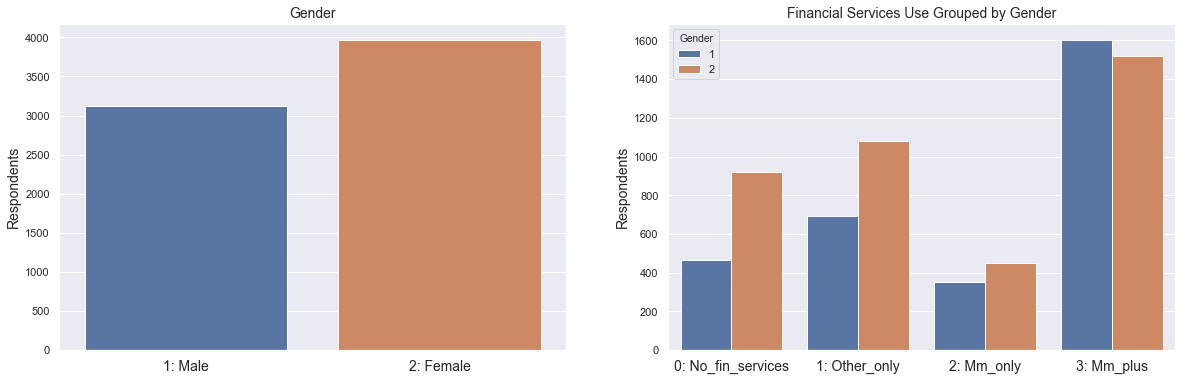

In [1583]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 6)

b = sns.countplot('Gender', data=df_spatial, ax = ax[0])
b.set_title('Gender', fontsize=14)
b.set_xticklabels(['1: Male', '2: Female'], fontsize=14)
b.set_ylabel("Respondents",fontsize=14)
b.set_xlabel("",fontsize=14)

c = sns.countplot('MM_Use', hue = 'Gender', data=df_spatial, ax = ax[1])
c.set_title('Financial Services Use Grouped by Gender', fontsize=14)
c.set_xticklabels(['0: No_fin_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
c.set_ylabel("Respondents",fontsize=14)
c.set_xlabel("",fontsize=14)

Majority of respondents are female, but the female to male gender ratio declines among **'MM_only'** and **'MM_plus'** respondents.

We hypothesize a **negative relationship** between age and mobile phone technology access and adoption and that divorced and widowed respondents tend to have a higher mean age.  

Plot the 'Marital_Status' distribution.  Then plot financial service use by marital status.  

Finally, plot 'Age' by 'Marital_Status' and group by financial services used.

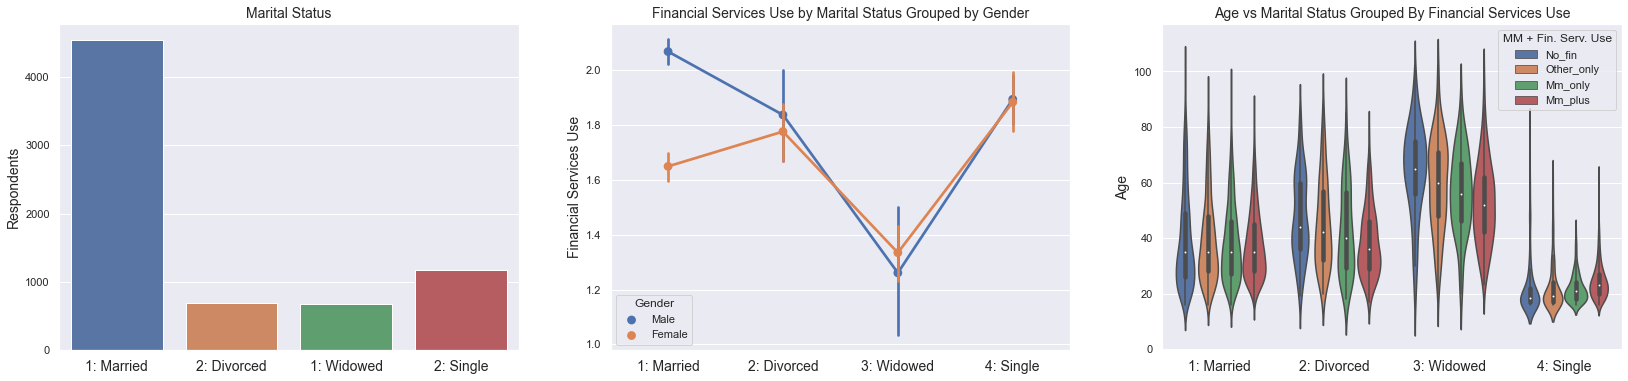

In [427]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(28, 6)

d = sns.countplot('Marital_Status', data=df_spatial, ax = ax[0])
d.set_title('Marital Status', fontsize=14)
d.set_xticklabels(['1: Married', '2: Divorced', '1: Widowed', '2: Single'], fontsize=14)
d.set_ylabel("Respondents",fontsize=14)
d.set_xlabel("",fontsize=14)

e = sns.factorplot(data= df_spatial, x= 'Marital_Status', y= 'MM_Use', hue = 'Gender',ax = ax[1])
ax[1].set_title('Financial Services Use by Marital Status Grouped by Gender', fontsize = 14)
ax[1].set_xticklabels(['1: Married', '2: Divorced', '3: Widowed', '4: Single'], fontsize=14)
ax[1].set_ylabel("Financial Services Use",fontsize=14)
ax[1].set_xlabel("",fontsize=14)
leg_handles = ax[1].get_legend_handles_labels()[0]
ax[1].legend(leg_handles, ['Male', 'Female'], title='Gender')
plt.close(2)

f = sns.violinplot(x ='Marital_Status', y = "Age", hue = 'MM_Use',  data=df_spatial, ax = ax[2])
f.set_title('Age vs Marital Status Grouped By Financial Services Use', fontsize=14)
f.set_xticklabels(['1: Married', '2: Divorced', '3: Widowed', '4: Single'], fontsize=14)
f.set_ylabel("Age",fontsize=14)
f.set_xlabel("",fontsize=14)
leg_handles = ax[2].get_legend_handles_labels()[0]
ax[2].legend(leg_handles, ['No_fin','Other_only', 'Mm_only', 'Mm_plus'], title='MM + Fin. Serv. Use')

The majority of Widowed respondents tend to fall in the **'No_financial_services'** and **'Other_only'** categories, but there is greater variability in the mean response for this group than for married respondents.  

Married males and widowed males display the largest difference in mean financial service use but there is high variability in the response for widowed males.

Because of the higher variability in the mean response for widowed males, conduct a **two-sided Welch's t-test** to test for significance in the difference and do not assume equal variance.

In [640]:
married_male = df_spatial['MM_Use'].loc[(df_spatial['Marital_Status'] == 1) & (df_spatial['Gender'] == 1)]
widowed_male = df_spatial['MM_Use'].loc[(df_spatial['Marital_Status'] == 3) & (df_spatial['Gender'] == 1)]

In [641]:
result =stats.ttest_ind(married_male,widowed_male,equal_var=False)

In [642]:
result

Ttest_indResult(statistic=6.138500402083867, pvalue=1.7995061983945036e-08)

The difference in mean financial services use between married males and widowed males is significant at the 1% level, so we reject the null hypothesis of equal means between the two groups. 

As expected, the mean age of widowed respondents is higher than for all other 'Marital_Status' groups.  

The mean age of **single respondents** who fall in the **'No_financial_services'** category is lower than the mean age of single respondents in the **'Mm_plus'** category, although the age difference between the two groups does not appear to be large.  

Conduct a similar two sided hypothesis test for the mean age difference between single respondents in the 'No_financial_services' and 'Mm_plus' categories. 

In [925]:
single_mmplus = df_spatial['Age'].loc[(df_spatial['Marital_Status'] == 4) & (df_spatial['MM_Use'] == 3)]
single_nofinancialservices = df_spatial['Age'].loc[(df_spatial['Marital_Status'] == 4) & (df_spatial['MM_Use'] == 0)]

In [926]:
result2 =stats.ttest_ind(single_mmplus,single_nofinancialservices,equal_var=False)

In [927]:
result2

Ttest_indResult(statistic=3.465534681875282, pvalue=0.0005972080348995354)

##### The difference in mean financial services use between single respondents in the **'No_financial_services'** and **'Mm_plus'** categories is significant at the 1% level, so we reject the null hypothesis of equal means between the two groups.

##### Test the theory that both **education level** and **mobile phone ownership** have a positive relationship with the level of financial inclusion.
##### Plot the 'Educ' distribution and the relationship between 'Educ' and financial services used.  Then Plot the 'Own_Mobile_Phone' distribution and the relationship between 'Own_Mobile_Phone' and financial services used.

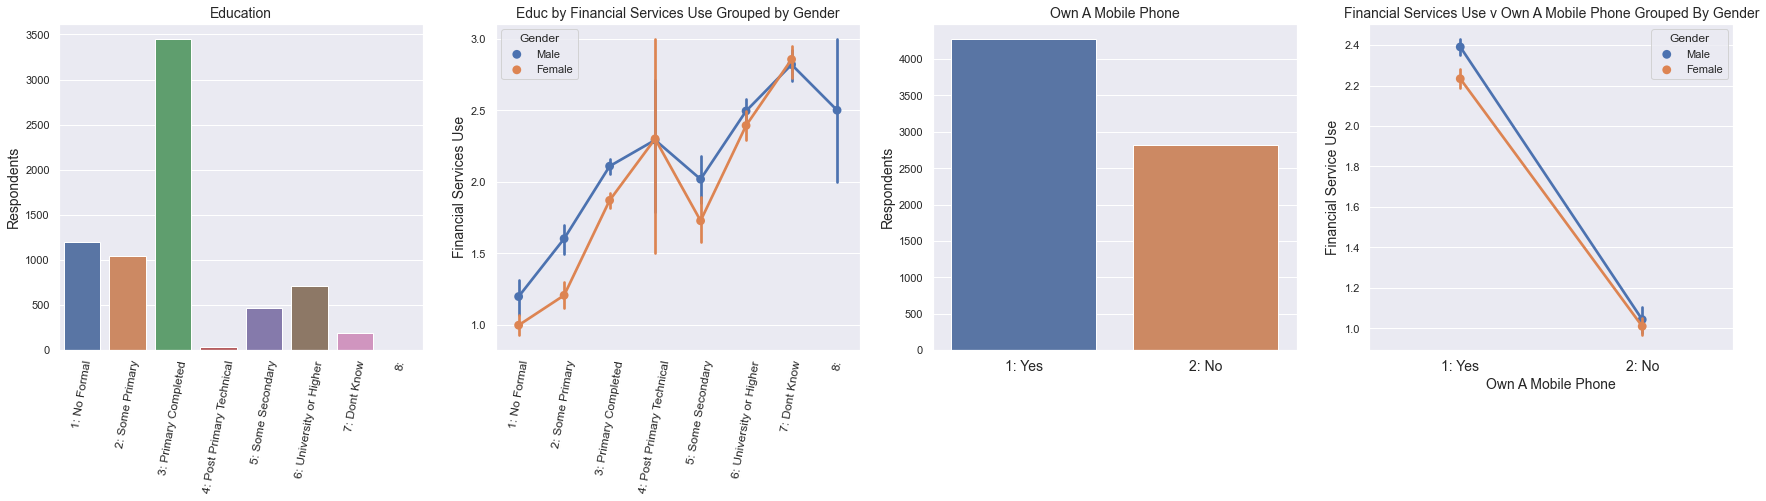

In [369]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(30, 6)

g = sns.countplot('Educ', data=df_spatial, ax = ax[0])
g.set_title('Education', fontsize=14)
g.set_xticklabels(['1: No Formal', '2: Some Primary', '3: Primary Completed', '4: Post Primary Technical', '5: Some Secondary', '6: University or Higher', '7: Dont Know', '8:'], fontsize=12)
g.set_ylabel("Respondents",fontsize=14)
g.set_xlabel("",fontsize=14)
ax[0].tick_params(axis='x',labelrotation=80)

h = sns.factorplot(data= df_spatial, x= 'Educ', y= 'MM_Use', hue = 'Gender', ax = ax[1])
ax[1].set_title('Educ by Financial Services Use Grouped by Gender', fontsize=14)
ax[1].set_xticklabels(['1: No Formal', '2: Some Primary', '3: Primary Completed', '4: Post Primary Technical', '5: Some Secondary', '6: University or Higher', '7: Dont Know', '8:'], fontsize=12)
ax[1].set_ylabel("Financial Services Use",fontsize=14)
ax[1].set_xlabel("",fontsize=14)
leg_handles = ax[1].get_legend_handles_labels()[0]
ax[1].legend(leg_handles, ['Male', 'Female'], title='Gender')
ax[1].tick_params(axis='x',labelrotation=80)

i = sns.countplot('Own_Mobile_Phone', data=df, ax = ax[2])
i.set_title('Own A Mobile Phone', fontsize=14)
i.set_xticklabels(['1: Yes', '2: No'], fontsize=14)
i.set_ylabel("Respondents",fontsize=14)
i.set_xlabel("",fontsize=14)

j = sns.factorplot(x ='Own_Mobile_Phone', y = "MM_Use", hue = 'Gender',  data=df_spatial, ax = ax[3])
ax[3].set_title('Financial Services Use v Own A Mobile Phone Grouped By Gender', fontsize=14)
ax[3].set_xticklabels(['1: Yes', '2: No'], fontsize=14)
ax[3].set_ylabel("Financial Service Use",fontsize=14)
ax[3].set_xlabel("Own A Mobile Phone",fontsize=14)
leg_handles = ax[3].get_legend_handles_labels()[0]
ax[3].legend(leg_handles, ['Male', 'Female'], title='Gender')
plt.close(2)
plt.close(3)
plt.close(4)

Female respondents with 'No Formal' education tend to either have **'No_financial_services'** or **'Other_only'**, while both male and female respondents with a 'University or higher' education tend to fall between the **'MM_only'** and **'MM_plus'** categories.  

The majority of respondents who don't own a mobile phone do not to use mobile money.

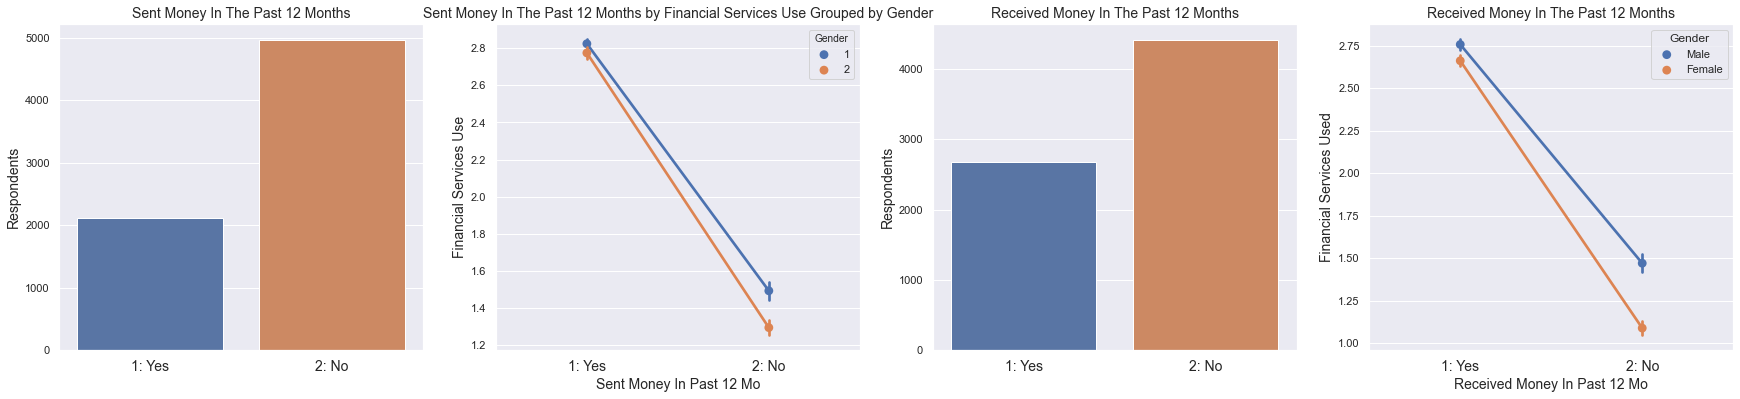

In [376]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(30, 6)

k = sns.countplot('Sent_Money_12Mo', data=df_spatial, ax = ax[0])
k.set_title('Sent Money In The Past 12 Months', fontsize=14)
k.set_xticklabels(['1: Yes', '2: No'], fontsize=14)
k.set_ylabel("Respondents",fontsize=14)
k.set_xlabel("",fontsize=14)

l = sns.factorplot(data= df_spatial, x= 'Sent_Money_12Mo', y= 'MM_Use', hue = 'Gender', ax = ax[1])
ax[1].set_title('Sent Money In The Past 12 Months by Financial Services Use Grouped by Gender', fontsize=14)
ax[1].set_xticklabels(['1: Yes', '2: No'], fontsize=14)
ax[1].set_ylabel("Financial Services Use",fontsize=14)
ax[1].set_xlabel("Sent Money In Past 12 Mo",fontsize=14)

m = sns.countplot('Received_Money_12Mo', data=df, ax = ax[2])
m.set_title('Received Money In The Past 12 Months', fontsize=14)
m.set_xticklabels(['1: Yes', '2: No'], fontsize=14)
m.set_ylabel("Respondents",fontsize=14)
m.set_xlabel("",fontsize=14)

n = sns.factorplot(x ='Received_Money_12Mo', y = "MM_Use", hue = 'Gender',  data=df_spatial, ax = ax[3])
ax[3].set_title('Received Money In The Past 12 Months', fontsize=14)
ax[3].set_xticklabels(['1: Yes', '2: No'], fontsize=14)
ax[3].set_ylabel("Financial Services Used",fontsize=14)
ax[3].set_xlabel("Received Money In Past 12 Mo",fontsize=14)
leg_handles = ax[3].get_legend_handles_labels()[0]
ax[3].legend(leg_handles, ['Male', 'Female'], title='Gender')
plt.close(2)
plt.close(3)
plt.close(4)

The majority of respondents who either sent or received money in the past twelve months fall in the **'MM_only'** or **'MM_plus'** categories.

**Visualize** the respondents' **geolocations** by financial service use category.

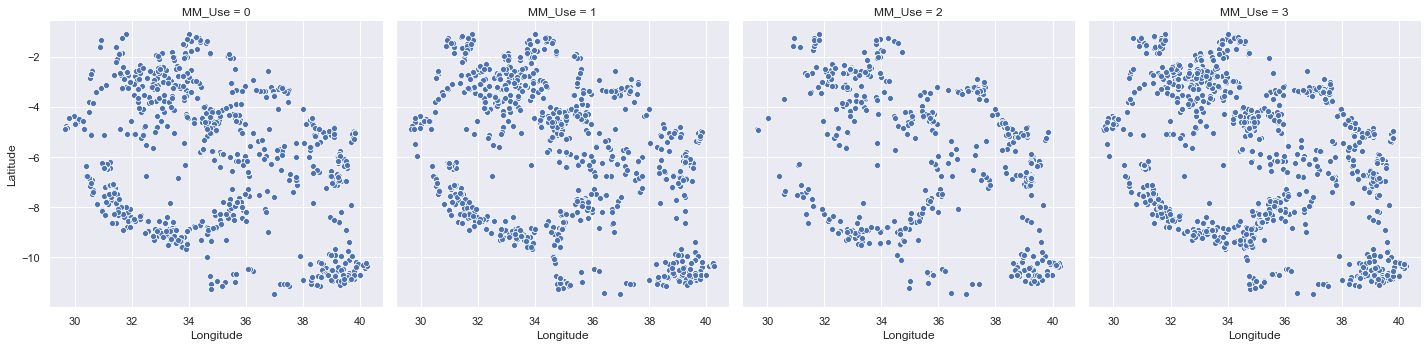

In [1594]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
v = sns.relplot(data= df_spatial, x= 'Longitude', y= 'Latitude', col = 'MM_Use', kind = 'scatter')
ax.set_title('Sent Money In The Past 12 Months', fontsize=14)
plt.close(1)

No discernible difference between the spatial distribution between the four groups, except that **'Mm_only'** has **relatively fewer respondents** as shown in the histogram above.

Test hypothesis of a greater proportion of 'MM_only' 'MM_plus' in **urban centers** like Dar-es-Salaam and Arusha and a higher proportion of 'No_financial_services' and 'Other_only' in **rural areas** like Tabora.  

Create a barplot showing respondents' mean financial services use by 'Region'.

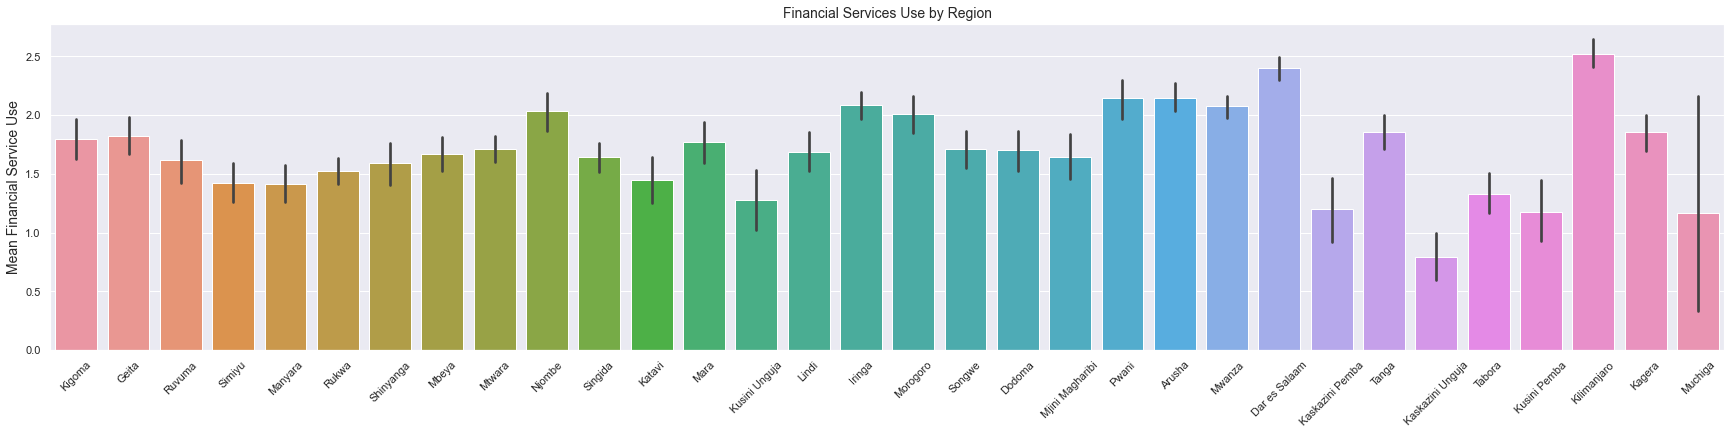

In [432]:
df_reg = df_spatial.drop([378]).sort_values(by = 'MM_Use')

fig, ax = plt.subplots()
fig.set_size_inches(30, 6)
o = sns.barplot(data= df_reg, x= 'Region', y= 'MM_Use', ax = ax)
o.set_title('Financial Services Use by Region', fontsize=14)
o.set_ylabel("Mean Financial Service Use",fontsize=14)
o.set_xlabel("",fontsize=14)
o.tick_params(axis='x',labelrotation=45)

As expected, urban regions such as **Dar-es-Salaam**, **Arusha** and **Kilimanjaro** have a higher mean mobile money and financial services use than rural areas such as **Ruvuma** and **Tabora.**

Test a theory of a **positive** relationship between regional purchasing power per capita and the level of financial inclusion.

Plot respondents' mean financial services use by purchasing power per capita.

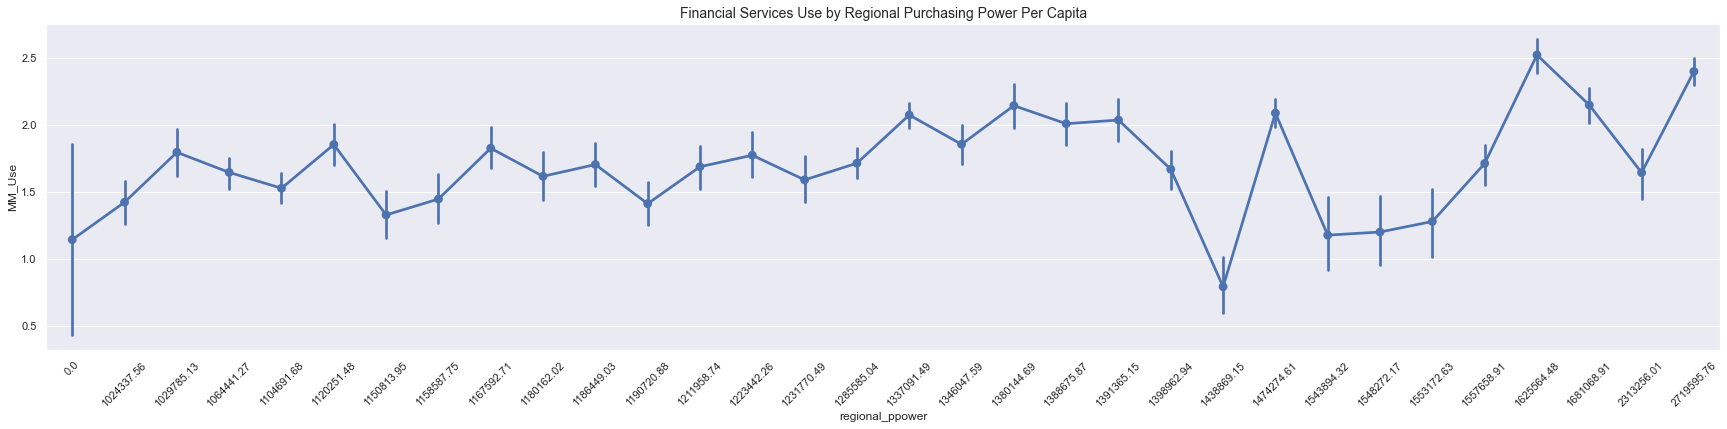

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 6)
sns.factorplot(data= df_spatial, x= 'regional_ppower', y= 'MM_Use', ax = ax)
ax.tick_params(axis='x',labelrotation=45)
ax.set_title('Financial Services Use by Regional Purchasing Power Per Capita', fontsize=14)
plt.close(2)

In [433]:
df_spatial['regional_ppower'].corr(df['MM_Use'])

0.13768383529012904

From df_demographics, we are able to see that Dar-es-Salaam, Kilimanjaro and Iringa have higher purchasing power per capita and higher financial service use, but the overall correlation is weak.

Region 'Kazkazini Unguja', off the Tanzania coast, has a low mean financial service use despite an above average purchasing power per capita. 

Test theory of a **positive** relationship between regional population density and the level of financial inclusion.  

Plot respondents' mean financial services use by population density.

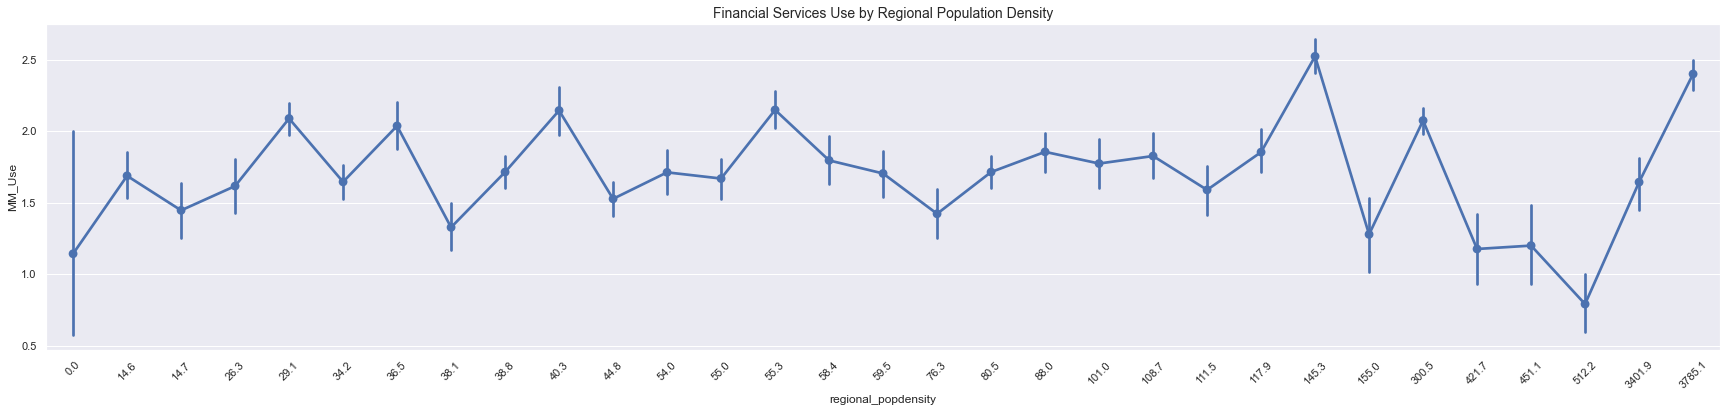

In [928]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 6)
sns.factorplot(data= df_spatial, x= 'regional_popdensity', y= 'MM_Use', ax = ax)
ax.tick_params(axis='x',labelrotation=45)
ax.set_title('Financial Services Use by Regional Population Density', fontsize=14)
plt.close(2)

In [133]:
df_spatial['regional_popdensity'].corr(df['MM_Use'])

0.08560888653112306

The correlation between population density and the level of financial inclusion is weak.

Test a hypothesis of a **negative relationship** between the distance from the nearest financial access point and the level of mobile money use by a respondent.

Create violin plots showing the distribution of respondents' distance from the nearest financial access point (i.e. ATM, mobile money agent, third party payment provider, bank branch) for each financial service use category and for each type of access point.

Text(0.5, 0, '')

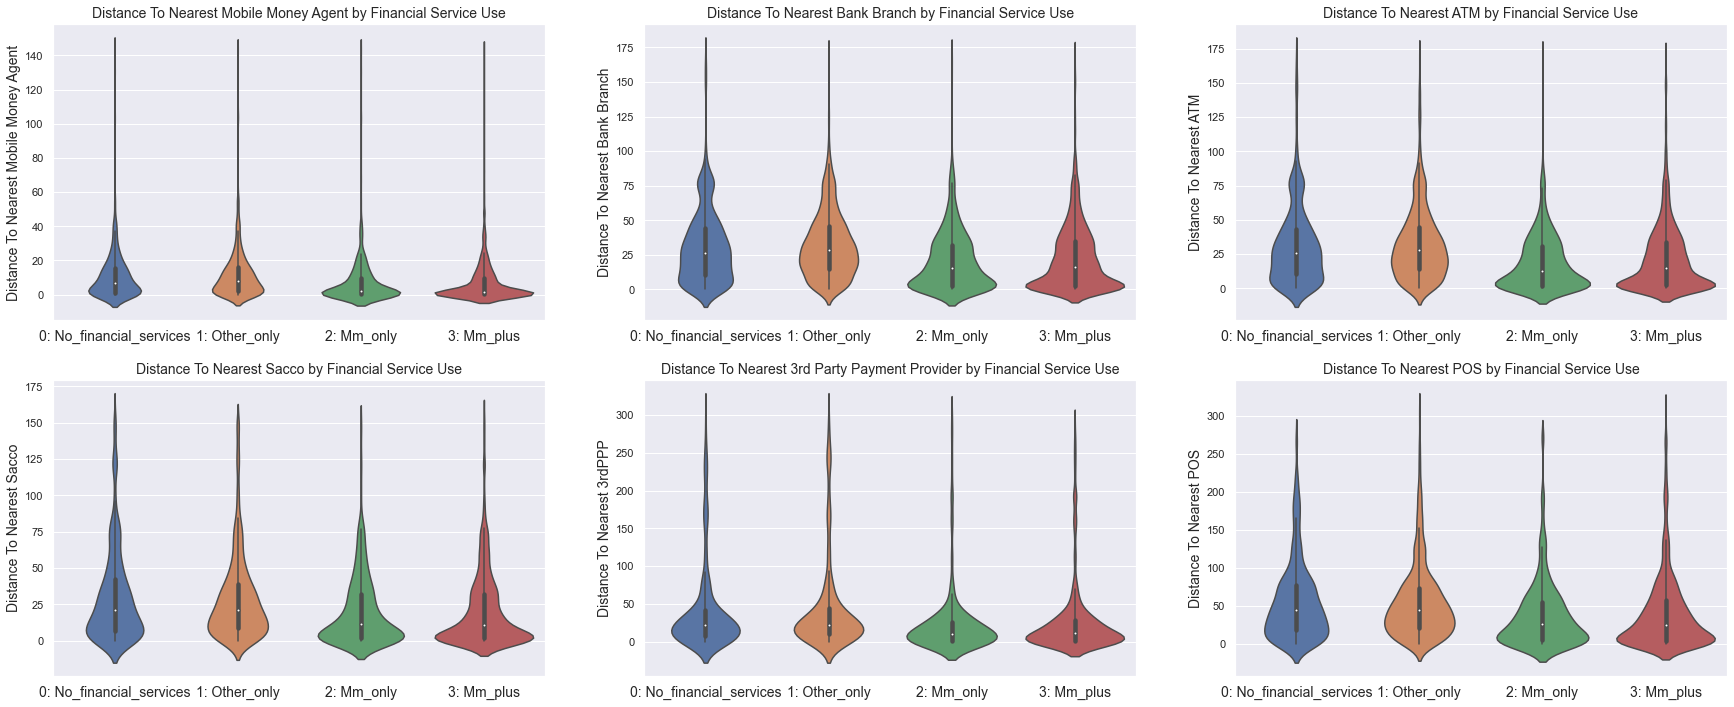

In [434]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(30, 12)

p = sns.violinplot(x ='MM_Use', y = 'mma_dist', data=df_spatial, ax = ax[0,0])
p.set_title('Distance To Nearest Mobile Money Agent by Financial Service Use', fontsize=14)
p.set_ylabel("Distance To Nearest Mobile Money Agent",fontsize=14)
p.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
p.set_xlabel("",fontsize=14)

q = sns.violinplot(x ='MM_Use', y = 'bank_dist', data=df_spatial, ax = ax[0,1])
q.set_title('Distance To Nearest Bank Branch by Financial Service Use', fontsize=14)
q.set_ylabel("Distance To Nearest Bank Branch",fontsize=14)
q.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
q.set_xlabel("",fontsize=14)

r = sns.violinplot(x ='MM_Use', y = 'atm_dist', data=df_spatial, ax = ax[0,2])
r.set_title('Distance To Nearest ATM by Financial Service Use', fontsize=14)
r.set_ylabel("Distance To Nearest ATM",fontsize=14)
r.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
r.set_xlabel("",fontsize=14)

s = sns.violinplot(x ='MM_Use', y = 'sacco_dist', data=df_spatial, ax = ax[1,0])
s.set_title('Distance To Nearest Sacco by Financial Service Use', fontsize=14)
s.set_ylabel("Distance To Nearest Sacco",fontsize=14)
s.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
s.set_xlabel("",fontsize=14)

t = sns.violinplot(x ='MM_Use', y = 'tppp_dist', data=df_spatial, ax = ax[1,1])
t.set_title('Distance To Nearest 3rd Party Payment Provider by Financial Service Use', fontsize=14)
t.set_ylabel("Distance To Nearest 3rdPPP",fontsize=14)
t.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
t.set_xlabel("",fontsize=14)

u = sns.violinplot(x ='MM_Use', y = 'pos_dist', data=df_spatial, ax = ax[1,2])
u.set_title('Distance To Nearest POS by Financial Service Use', fontsize=14)
u.set_ylabel("Distance To Nearest POS",fontsize=14)
u.set_xticklabels(['0: No_financial_services','1: Other_only','2: Mm_only','3: Mm_plus'], fontsize=14)
u.set_xlabel("",fontsize=14)

Conduct a two sided Welch's t-test to determine whether the **difference** in the mean distance to the nearest mobile money agent is significant between respondents in the **'Other_only'** and **'Mm_only'** categories. 

In [435]:
other_only = df_spatial['mma_dist'].loc[(df_spatial['MM_Use'] == 1)]
mm_only = df_spatial['mma_dist'].loc[(df_spatial['MM_Use'] == 2)]

In [436]:
result3 =stats.ttest_ind(other_only,mm_only,equal_var=False)

In [437]:
result3

Ttest_indResult(statistic=8.67324650727652, pvalue=9.375359363282172e-18)

The difference in mean distance to the nearest mobile money agent between respondents in the **'Other_only'** and **'Mm_only'** categories is significant at the 1% level, so we reject the null hypothesis of equal means between the two groups. 

Plot a correlation matrix for the **raw dataset** 'df_spatial'

In [933]:
df_spatial.columns

Index(['ID', 'Age', 'Gender', 'Marital_Status', 'Educ', 'Rent_Own',
       'Own_Other_Property', 'Own_Mobile_Phone', 'Salaried_Worker', 'Trader',
       'Service_Provider', 'Casual_Worker', 'Earn_Rent',
       'Earn_Interest_Income', 'Earn_Pension', 'On_Welfare', 'Rely_On_Others',
       'Expenses_Paid', 'Other', 'Employer_Type', 'Goods_Sold',
       'Services_Provided', 'Sent_Money_12Mo', 'Last_Sent',
       'Received_Money_12Mo', 'Last_Received', 'Goods_Purchase_Freq',
       'Bills_Pay_Freq', 'Kiswahili', 'English', 'Latitude', 'Longitude',
       'Region', 'mobile_money', 'savings', 'borrowing', 'insurance', 'MM_Use',
       'regional_area', 'regional_ppower', 'regional_popdensity',
       'indiv_lat_long', 'mma_dist', 'bank_dist', 'atm_dist', 'sacco_dist',
       'tppp_dist', 'pos_dist', 'bus_dist', 'mfi_dist', 'post_dist',
       'city_dist', 'city_10km_radius'],
      dtype='object')

In [934]:
df_spatial.head()

,ID,Age,Gender,Marital_Status,Educ,Rent_Own,Own_Other_Property,Own_Mobile_Phone,Salaried_Worker,Trader,...,bank_dist,atm_dist,sacco_dist,tppp_dist,pos_dist,bus_dist,mfi_dist,post_dist,city_dist,city_10km_radius
0,5086,98,2,3,1,1,2,2,0,0,...,34.077154,50.664821,32.174329,34.086475,227.225120,34.230444,33.904747,33.654118,44.915710,0
1,1258,40,1,1,3,5,1,1,1,0,...,2.210803,2.207341,4.918423,2.363903,5.613890,66.022278,2.417876,4.512002,5.372188,Zanzibar City
2,331,18,2,4,6,3,2,1,0,0,...,1.128424,1.084240,0.335244,0.288060,139.064094,120.888521,1.224672,0.541854,2.511113,Morogoro
3,6729,50,1,1,3,1,1,1,0,0,...,14.748761,6.268469,5.115917,5.143686,37.040948,170.276607,14.971460,5.176185,93.256329,0
4,8671,34,1,1,1,1,2,1,0,1,...,35.903198,35.885429,36.110567,250.102209,106.685663,297.744234,107.664933,93.087482,92.124178,0


In [935]:
correlation = df_spatial[df_spatial.columns[0:]].corr()['MM_Use'][:-1]
correlation.sort_values()

Received_Money_12Mo    -0.589793
Sent_Money_12Mo        -0.547857
Own_Mobile_Phone       -0.529444
Kiswahili              -0.345513
English                -0.287592
atm_dist               -0.180448
bank_dist              -0.168715
sacco_dist             -0.153265
mma_dist               -0.150272
Gender                 -0.142522
bus_dist               -0.141293
post_dist              -0.137477
pos_dist               -0.135414
tppp_dist              -0.135404
mfi_dist               -0.131663
ID                     -0.130422
Age                    -0.127881
Own_Other_Property     -0.116153
Expenses_Paid          -0.112399
On_Welfare             -0.068852
regional_area          -0.057880
Marital_Status         -0.033330
Rely_On_Others         -0.023255
Casual_Worker           0.012045
Trader                  0.013485
Earn_Rent               0.021247
Earn_Interest_Income    0.028692
Other                   0.029139
Latitude                0.037078
Earn_Pension            0.037219
Longitude 

Text(0.5, 1.0, 'Correlation matrix')

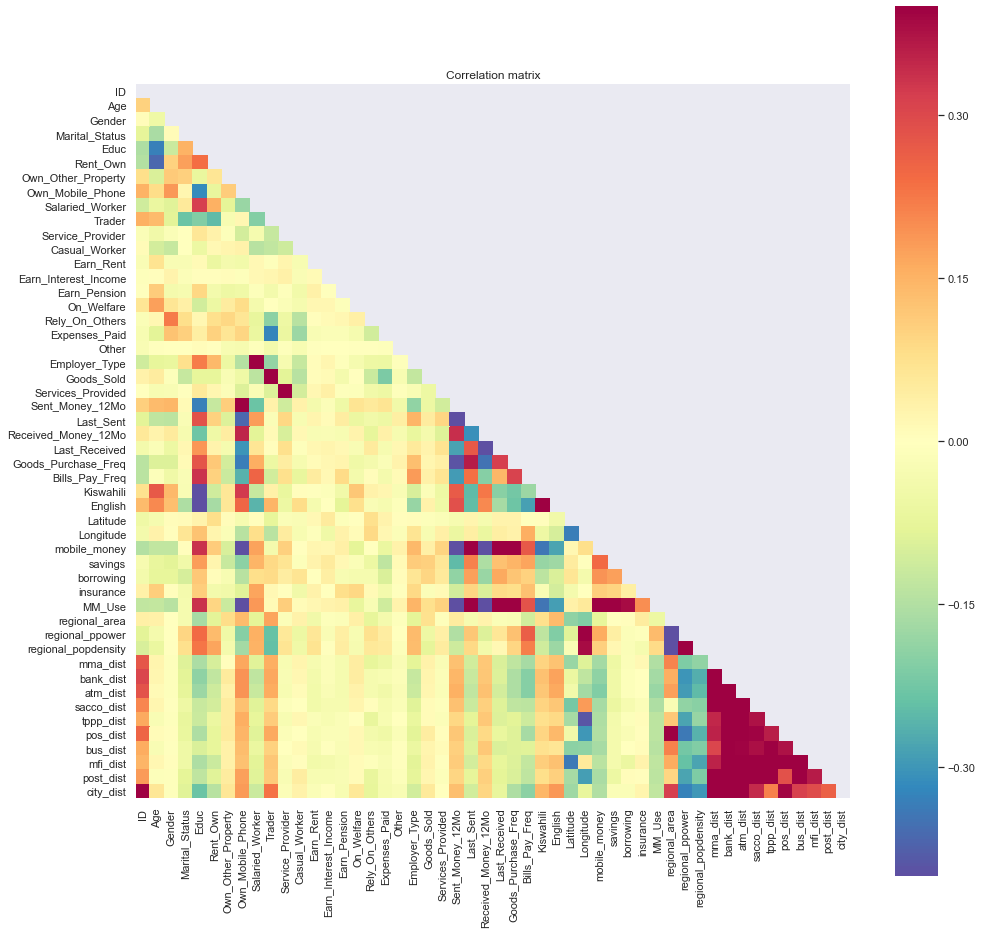

In [936]:
corrmatrix = df_spatial.corr()
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrmatrix, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4, ax=ax)
plt.title('Correlation matrix')

The features **'Educ'**, **'Own_Mobile_Phone'**, **'Sent_Money_12Mo'**, **'Last_Sent'**, **'Received_Money_12Mo'**, **'Last_Received'**, **'Goods_Purchase_Freq'**,**'Bills_Pay_Freq'**, **'Kiswahili'** and 
**'English'** have relatively high correlations with financial services use (i.e. **'MM_Use'**)  

Distance to a financial access point is **negatively correlated** with mobile financial services use as expected, but not highly.

**Clean the data**

Remove rows corresponding to the 'Region' column where ArcGIS reverse geocoding reported retrieval errors.  

Remove rows corresponding to the 'Region' value 'Muchiga' which does not exist.

In [44]:
df_clean = df_spatial

In [45]:
df_clean  = df_clean[df_clean.Region != 'Cannot perform query. Invalid query parameters.\nUnable to find address for the specified location.\n(Error Code: 400)']

In [46]:
df_clean  = df_clean[df_clean.Region != 'Muchiga']

Delete erroneous row with level 8 for 'Educ' - the level does not appear in the variable code book.

In [47]:
df_clean  = df_clean[df_clean.Educ != 8]

Reset the index for df_clean

In [48]:
df_clean = df_clean.reset_index(drop=True)

'Rent_Own' category level 6 'Dont Know' has only 8 examples, group them with level 5.

In [59]:
#df_clean.groupby(['Rent_Own']).count()[['ID']]

In [49]:
df_clean['Rent_Own'] = df_clean['Rent_Own'].map({1:1,2:2,3:3,4:4,5:5,6:5})

'Employer_Type' category levels 5, 6 and 7 have very examples, lump them together.

In [86]:
#df_clean.groupby(['Employer_Type']).count()[['ID']]

In [50]:
df_clean['Employer_Type'] = df_clean['Employer_Type'].map({-1:-1,1:1,2:2,3:3,5:4,6:4,7:4})

'Goods_Sold' levels 4, 2, 8, 9 and 10 have very few examples, group them together.

In [986]:
#df_clean.groupby(['Goods_Sold']).count()[['ID']].sort_values(by = ['ID'], ascending= False)

In [51]:
#df_clean['Goods_Sold'] = df_clean['Goods_Sold'].map({-1:-1,1:1,6:6,3:3,5:5,7:7,4:7,2:7,8:7,9:7,10:7})
df_clean['Goods_Sold'] = df_clean['Goods_Sold'].map({-1:-1,1:1,6:6,3:3,5:5,7:7,4:11,2:12,8:13,9:14,10:15})

'Services_Provided' levels 4, 12, 9, 3, 8, 2 and 6 have very few examples, group them together.

In [90]:
#df_clean.groupby(['Services_Provided']).count()[['ID']].sort_values(by = ['ID'], ascending= False)

In [52]:
df_clean['Services_Provided'] = df_clean['Services_Provided'].map({-1:-1, 5:5, 1:1, 7:7, 4:6, 12:6, 9:6, 3:6, 8:6, 2:6, 6:6})

All features with multiple category levels, such as 'Rent_Own', 'Educ' are **unordered** categorical variables.  

Get dummy variables for these features.  Drop the first dummy variable for each feature to avoid **multi-collinearity**.

In [53]:
df_clean = pd.get_dummies(df_clean, columns=['Marital_Status', 'Educ', 'Rent_Own', 'Employer_Type', 'Goods_Sold', 'Services_Provided', 'Last_Sent', 'Last_Received', 'Goods_Purchase_Freq', 'Bills_Pay_Freq','Kiswahili', 'English'], drop_first = True)

From the pairplots, we see that continuous features do not necessarily follow a normal distribution.  

**Normalize** all continuous feature variables so that all features contribute equally to the result, particularly with distance based algorithms.

In [54]:
cols_to_scale = ['Age','mma_dist', 'bank_dist', 'atm_dist', 'sacco_dist', 'tppp_dist', 'pos_dist', 'bus_dist', 'mfi_dist', 'post_dist','regional_ppower','regional_popdensity', 'regional_area', 'city_dist']  
for i in cols_to_scale:
    df_clean[i + '_scaled'] = (df_clean[i]-df_clean[i].min())/(df_clean[i].max()-df_clean[i].min())

In [55]:
df_clean[df_clean.isnull().any(axis=1)]

,ID,Age,Gender,Own_Other_Property,Own_Mobile_Phone,Salaried_Worker,Trader,Service_Provider,Casual_Worker,Earn_Rent,...,sacco_dist_scaled,tppp_dist_scaled,pos_dist_scaled,bus_dist_scaled,mfi_dist_scaled,post_dist_scaled,regional_ppower_scaled,regional_popdensity_scaled,regional_area_scaled,city_dist_scaled


The feature 'Region' has 32 **unordered** category levels (i.e. regions in the country).  

Instead of creating 32 new dummy features, set each category value, i.e. 'Region' to the **mean response** (financial service use) for the category value.

In [56]:
mean_response = df_clean.groupby(['Region']).mean()[['MM_Use']].sort_values(by = ['MM_Use']).reset_index()

In [140]:
#mean_response

In [57]:
region = mean_response['Region']
response = mean_response['MM_Use']
mean_response_mapping = {region[i]: response[i] for i in range(len(region))} 

In [58]:
df_clean['Region'] = df_clean['Region'].map(mean_response_mapping)

The feature **'city_20km_radius'** has 32 unordered category levels (i.e. capitals of regions).  

Set each category value to the mean response (financial service use).

In [59]:
city_response = df_clean.groupby(['city_20km_radius']).mean()[['MM_Use']].sort_values(by = ['MM_Use']).reset_index()

In [145]:
#city_response

In [60]:
city = city_response['city_20km_radius']
response_cap = city_response['MM_Use']
city_response_mapping = {city[i]: response_cap[i] for i in range(len(city))} 

In [61]:
df_clean['city_20km_radius'] = df_clean['city_20km_radius'].map(city_response_mapping)

##### Inspect df_clean.

In [813]:
df_clean.iloc[:5, : 19]

,ID,Age,Gender,Own_Other_Property,Own_Mobile_Phone,Salaried_Worker,Trader,Service_Provider,Casual_Worker,Earn_Rent,Earn_Interest_Income,Earn_Pension,On_Welfare,Rely_On_Others,Expenses_Paid,Other,Sent_Money_12Mo,Received_Money_12Mo,Latitude
0,5086,98,2,2,2,0,0,0,0,0,0,0,0,1,0,0,2,2,-4.460442
1,1258,40,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,-6.176438
2,331,18,2,2,1,0,0,0,0,0,0,0,0,1,0,0,2,2,-6.825702
3,6729,50,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,2,-3.372049
4,8671,34,1,2,1,0,1,0,0,0,0,0,0,0,0,0,2,1,-7.179645


In [814]:
df_clean.iloc[:5, 19:38]

,Longitude,Region,mobile_money,savings,borrowing,insurance,MM_Use,regional_area,regional_ppower,regional_popdensity,indiv_lat_long,mma_dist,bank_dist,atm_dist,sacco_dist,tppp_dist,pos_dist,bus_dist,mfi_dist
0,29.811396,1.795812,0,0,0,0,0,44372.373682,1029785.13,58.4,"(-4.46044192, 29.8113964)",3.245788,34.077154,50.664821,32.174329,34.086475,227.225120,34.230444,33.904747
1,39.244871,1.643678,1,1,1,0,3,233.731054,2313256.01,3401.9,"(-6.17643812, 39.24487062)",1.292799,2.210803,2.207341,4.918423,2.363903,5.613890,66.022278,2.417876
2,37.652798,2.009569,1,0,0,0,2,69341.722231,1388675.87,38.8,"(-6.82570215, 37.65279782)",0.122506,1.128424,1.084240,0.335244,0.288060,139.064094,120.888521,1.224672
3,35.808307,2.148789,1,0,1,0,3,38096.252540,1681068.91,55.3,"(-3.37204916, 35.808307299999996)",0.031501,14.748761,6.268469,5.115917,5.143686,37.040948,170.276607,14.971460
4,31.039095,1.526961,1,1,0,1,3,28566.091785,1104691.68,44.8,"(-7.17964514, 31.03909501)",7.665565,35.903198,35.885429,36.110567,250.102209,106.685663,297.744234,107.664933


In [815]:
df_clean.iloc[:5, 38:58]

,post_dist,city_dist,city_10km_radius,Marital_Status_2,Marital_Status_3,Marital_Status_4,Educ_2,Educ_3,Educ_4,Educ_5,Educ_6,Educ_7,Rent_Own_2,Rent_Own_3,Rent_Own_4,Rent_Own_5,Employer_Type_1,Employer_Type_2,Employer_Type_3,Employer_Type_4
0,33.654118,44.915710,1.730023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.512002,5.372188,1.609272,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,0.541854,2.511113,2.722222,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,5.176185,93.256329,1.730023,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,93.087482,92.124178,1.730023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [816]:
df_clean.iloc[:5, 58:75]

,Goods_Sold_1,Goods_Sold_3,Goods_Sold_5,Goods_Sold_6,Goods_Sold_7,Services_Provided_1,Services_Provided_5,Services_Provided_6,Services_Provided_7,Last_Sent_1,Last_Sent_2,Last_Sent_3,Last_Sent_4,Last_Sent_5,Last_Sent_6,Last_Received_1,Last_Received_2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [817]:
df_clean.iloc[:5, 75:92]

,Last_Received_3,Last_Received_4,Last_Received_5,Last_Received_6,Goods_Purchase_Freq_2,Goods_Purchase_Freq_3,Goods_Purchase_Freq_4,Goods_Purchase_Freq_5,Bills_Pay_Freq_1,Bills_Pay_Freq_2,Bills_Pay_Freq_3,Bills_Pay_Freq_4,Bills_Pay_Freq_5,Kiswahili_2,Kiswahili_3,Kiswahili_4,Kiswahili_5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [818]:
df_clean.iloc[:5, 92:116]

,English_2,English_3,English_4,English_5,Age_scaled,mma_dist_scaled,bank_dist_scaled,atm_dist_scaled,sacco_dist_scaled,tppp_dist_scaled,pos_dist_scaled,bus_dist_scaled,mfi_dist_scaled,post_dist_scaled,regional_ppower_scaled,regional_popdensity_scaled,regional_area_scaled,city_dist_scaled
0,0,0,1,0,0.976190,0.022626,0.200942,0.298759,0.207269,0.113216,0.739038,0.111087,0.178446,0.155854,0.003213,0.011616,0.586472,0.203725
1,0,0,1,0,0.285714,0.009007,0.013030,0.012999,0.031660,0.007851,0.018185,0.214340,0.012642,0.020819,0.760308,0.898369,0.000000,0.024191
2,0,0,0,0,0.023810,0.000846,0.006647,0.006375,0.002131,0.000956,0.452269,0.392533,0.006359,0.002423,0.214916,0.006418,0.918241,0.011201
3,0,0,1,0,0.404762,0.000212,0.086964,0.036948,0.032933,0.017084,0.120410,0.552934,0.078747,0.023897,0.387393,0.010794,0.503081,0.423199
4,0,0,1,0,0.214286,0.053446,0.211710,0.211603,0.232630,0.830707,0.346949,0.966921,0.566855,0.431248,0.047399,0.008010,0.376453,0.418059


In [62]:
df_clean.columns

Index(['ID', 'Age', 'Gender', 'Own_Other_Property', 'Own_Mobile_Phone',
       'Salaried_Worker', 'Trader', 'Service_Provider', 'Casual_Worker',
       'Earn_Rent',
       ...
       'sacco_dist_scaled', 'tppp_dist_scaled', 'pos_dist_scaled',
       'bus_dist_scaled', 'mfi_dist_scaled', 'post_dist_scaled',
       'regional_ppower_scaled', 'regional_popdensity_scaled',
       'regional_area_scaled', 'city_dist_scaled'],
      dtype='object', length=115)

Drop unnecessary columns.

In [63]:
df_clean = df_clean.drop(columns = ['ID', 'Age','Latitude', 'Longitude',
                                                   'mobile_money', 'savings', 'borrowing', 'insurance',
                                                   'regional_ppower','regional_popdensity', 'regional_area', 'indiv_lat_long', 'mma_dist','bank_dist','atm_dist', 'sacco_dist','tppp_dist','pos_dist', 'bus_dist','mfi_dist', 'post_dist',
                                                   'atm_dist_scaled','bus_dist_scaled', 'tppp_dist_scaled','pos_dist_scaled','mfi_dist_scaled','regional_popdensity_scaled', 'regional_area_scaled', 'city_dist'
                                                    ], axis = 'columns')

Prepare a correlation matrix with the **new processed features** in df_clean.

Text(0.5, 1.0, 'Correlation matrix')

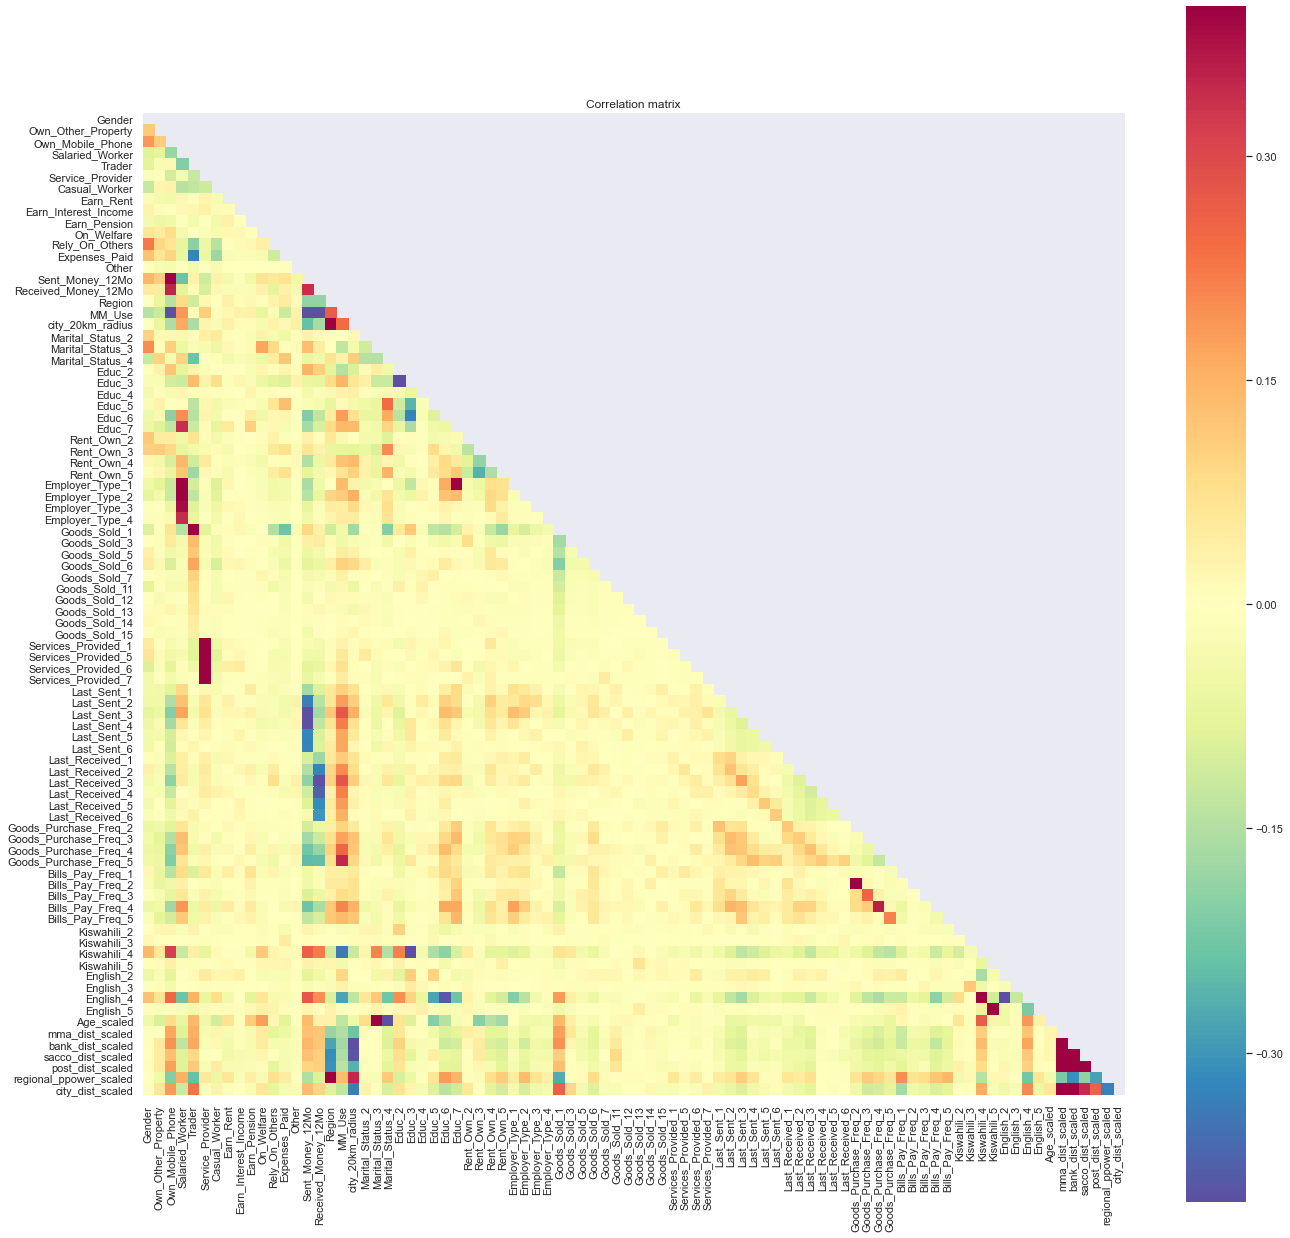

In [62]:
corrmatrix = df_clean.corr()
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(corrmatrix, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4, ax=ax)
plt.title('Correlation matrix')

In [90]:
pd.options.display.max_rows = 4000
correlation  = df_clean[df_clean.columns[0:]].corr()['MM_Use'].sort_values()
correlation

Received_Money_12Mo      -0.590040
Sent_Money_12Mo          -0.547853
Own_Mobile_Phone         -0.529707
Kiswahili_4              -0.340202
English_4                -0.280775
bank_dist_scaled         -0.169172
sacco_dist_scaled        -0.153476
mma_dist_scaled          -0.150466
Educ_2                   -0.143768
Gender                   -0.142168
post_dist_scaled         -0.137828
city_dist_scaled         -0.130323
Marital_Status_3         -0.129322
Age_scaled               -0.128369
Own_Other_Property       -0.116045
Expenses_Paid            -0.112559
Rent_Own_3               -0.074185
On_Welfare               -0.068943
Goods_Sold_3             -0.051556
Goods_Sold_1             -0.040868
Kiswahili_5              -0.037020
Rent_Own_2               -0.030926
Rely_On_Others           -0.023580
Goods_Sold_13            -0.023414
Kiswahili_2              -0.020873
English_5                -0.015426
Marital_Status_2         -0.001438
Kiswahili_3               0.000013
Casual_Worker       

A **high** financial transaction **recency** and **frequency**, (**'Last_Sent'**, **'Last_Received'**, **'Goods_Purchase_Freq'**,**'Bills_Pay_Freq'**, **Sent_Money_12Mo**, **Received_Money_12Mo**), **region** and proximity to a **regional capital** maintain relatively high **positive** correlations with financial services use.  

**Illiteracy** in English and Kiswahili is **negatively** correlated with financial inclusion.
Distance to a **bank**, **sacco** and **mobile money agent** is **negatively** correlated with mobile financial services use as expected but the correlation is **weak**.  

**Regional** location of a respondent has a relatively higher positive correlation with the response variable.

The distance metrics seem to be highly correlated with each other - check for **multicollinearity**

In [193]:
correlation  = df_clean.corr()['mma_dist_scaled'].sort_values()

In [192]:
correlation

city_20km_radius         -0.230162
regional_ppower_scaled   -0.213692
Region                   -0.183779
MM_Use                   -0.150466
Bills_Pay_Freq_1         -0.117683
Goods_Purchase_Freq_4    -0.095511
Educ_6                   -0.093351
Last_Sent_3              -0.089016
Bills_Pay_Freq_4         -0.088898
Marital_Status_4         -0.085911
Salaried_Worker          -0.084732
Last_Received_3          -0.081780
Rent_Own_5               -0.080526
Rent_Own_4               -0.080428
Educ_7                   -0.075153
Goods_Purchase_Freq_3    -0.074535
Last_Sent_2              -0.074293
Rely_On_Others           -0.074078
Bills_Pay_Freq_5         -0.072342
Goods_Sold_6             -0.071980
Employer_Type_2          -0.068709
Goods_Purchase_Freq_5    -0.067383
Last_Received_2          -0.063994
Expenses_Paid            -0.054991
Goods_Purchase_Freq_2    -0.051017
Bills_Pay_Freq_3         -0.043604
Educ_5                   -0.042281
Last_Received_1          -0.038828
Bills_Pay_Freq_2    

##### There is no multicollinearity

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_pca = df_clean.drop('MM_Use', axis = 1)
y_pca = df_clean['MM_Use']
X_pca_scaled = StandardScaler().fit_transform(X_pca)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_pca_scaled)
df_pca = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5'])
df_pca_final = pd.concat([df_pca, y_pca], axis = 1)

### 3.5 Results

What are your results?

[Back to top](#Table-of-contents)

**Model Selection**

Our problem is an example of **supervised learning** which relates to systems where you have input variables $x$ and an output variable $Y$, and you use an algorithm to induce the mapping function from the input to the output, $f(x)$.
 
As stated above, the problem involves determining the output of variables within a given category (e.g. 'Other_only', 'Mm_only') based on socio-economic and demographic features, or **classification**.
 
The target variable has four categories based on the types of financial services used by each respondent.  The categories are mutually exclusive as each respondent is assigned to one and only one category. This is an instance of **multi-class classification**.
 
There are a large number of machine learning algorithms that can be applied to our problem type, including neural networks, genetic algorithms and decision trees.  
 
Our training data contains 7,100 samples with a combination of continuous and categorical features.  Based on this information we consider the following models.
 
+ **Support Vector Machines** are supervised learning algorithms that search for hyperplanes in the feature space in order to to classify observations.  SVMs are effective in high dimensional spaces and when the number of features exceed the number of samples. They are not suitable for large datasets.

+ **Decision Tree Classifiers** extensively subspace the instance space into mutually exclusive categories. They are very popular and have been applied to both classification and regression problems.  A key advantage is that they do not require a lot of data preprocessing such as normalization or scaling and are highly intuitive.  One disadvantage is that they are sensitive to changes in the training data.

+ **k-Nearest-Neigbour** algorithms classify observations by a plurality vote of its neighbors, with the observation being assigned to the class most common among its k nearest neighbors.  Advantages are that it is non-parametric, does not require a training step and easy to implement for multiclass classification problems.  Disadvantages are that it is slow, requires small numbers of features, it needs features to be scaled and performs poorly with imbalanced data. 

+ **Random Forest Classifiers** consist of a large number of decision trees that operate as an ensemble.  They can handle high dimensional data, is robust to outliers and high dimensional features and can handle unbalanced data.

+ **Logistic Regression** models predict a logit transformation of the response variable.  They are highly interpretable, don't require feature scaling and outputs well calibrated probabilities.  A disadvantage is that they are not suited to non-linear problems.

+ **Gaussian Naive Bayes** is a conditional probability model. It has a low propensity to overfit.  Training is very quick as it consists computing priors and likelihoods.  A disadvantage is that it cannot incorporate feature interactions.

All of these classifiers are supported by Scikit-learn's libraries as **'inherently multi-class'**.  We will explore their relative performance in predicting financial service use.

**Training the models, validating and testing results**

First, get an **overview** of the relative performance for the set of classifiers and plot the **important features** for each classifier.

For linear SVC and logistic regression we will first use the **absolute value** of **parameter weights** as a **'crude'** proxy measure for feature importance (parameter weights may be either positive or negative).  

Then, we will compare the **crude** results with **recursive feature elimination** (**'RFE'**).

For k-NN and Gaussian Naive Bayes report the accuracy score.

Prepare the training set and test sets.

In [105]:
df_train = df_clean

In [106]:
train, test = train_test_split(df_train, test_size = 0.2, stratify=df_train['MM_Use'], random_state = 1234)
X_train = train.drop('MM_Use', axis = 1)
y_train = train['MM_Use']
X_test = test.drop('MM_Use', axis = 1)
y_test = test['MM_Use']

In [107]:
from sklearn import svm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [108]:
svm_clf = svm.SVC(kernel='linear')
lr_clf = LogisticRegressionCV(solver='lbfgs')
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=9)
gnb_clf = GaussianNB()
rf_clf = RandomForestClassifier()

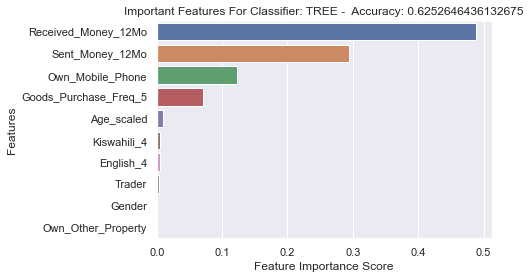

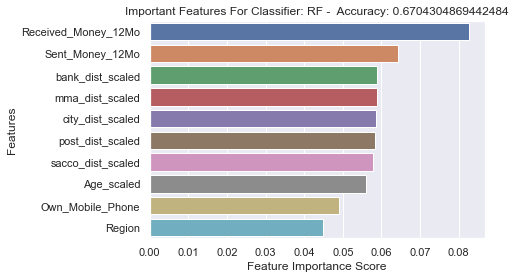

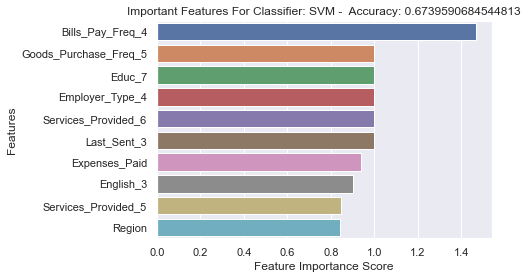

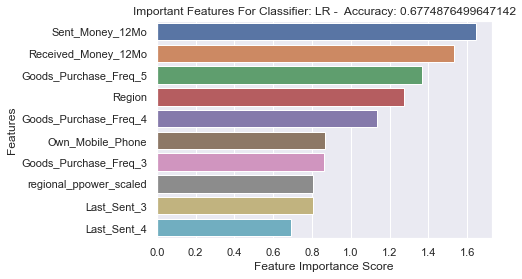

Classifier KNN accuracy:  0.6033874382498235
Classifier GNB accuracy:  0.39026111503175726


In [109]:
features = list(X_train.columns)
models = {'TREE': tree_clf, 'RF': rf_clf, 'SVM': svm_clf, 'LR':lr_clf, 'KNN': knn_clf, 'GNB': gnb_clf} 
for k,v in models.items():
    v.fit(X_train,y_train)
    y_pred = v.predict(X_test)
    if k == 'TREE' or k == 'RF':
        feature_imp = pd.Series(v.feature_importances_,index= features).nlargest(10)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        # Add labels to your graph
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Important Features For Classifier: " + k + ' -  Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
        plt.show()
    elif k == 'LR' or k == 'SVM':
        feature_imp = pd.Series(abs(v.coef_[0]), index=features).nlargest(10)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Important Features For Classifier: " + k + ' -  Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
        plt.show()
    else:
        print('Classifier ' + k + ' accuracy: ',metrics.accuracy_score(y_test, y_pred))

For the SVM classifier the most important features are **recency and frequency of financial transactions**, **expenses paid by someone else** and **small scale farmer** and **education**.

For the Logistic Regression classifier the most important features are **recency and frequency of financial transactions**, **regional location of the respondent** and **mobile phone ownership**.

The most important features for the decision tree classifier are **recency and frequency of financial transactions**, and for the random forest classifier they are **recency of financial transactions**, **distance to financial access points**, **mobile phone ownership** and **Region**.

All models report roughly similar accuracy scores except for k-NN and Gaussian Naive Bayes which report significantly lower scores.

Find the 10 most important features for logistic regression and SVM using **recursive feature elimination** (**'RFE'**).

Compare the results with the 'crude' measure of ranking parameter weights by absolute value.

In [751]:
from sklearn.feature_selection import RFE
logreg = LogisticRegressionCV()
rfe = RFE(logreg,n_features_to_select=10)
model = rfe.fit(X_train,y_train)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns)))

Features sorted by their rank:
[(1, 'Employer_Type_1'), (1, 'Goods_Purchase_Freq_2'), (1, 'Goods_Purchase_Freq_3'), (1, 'Goods_Purchase_Freq_4'), (1, 'Goods_Purchase_Freq_5'), (1, 'Own_Mobile_Phone'), (1, 'Received_Money_12Mo'), (1, 'Region'), (1, 'Sent_Money_12Mo'), (1, 'regional_ppower_scaled'), (2, 'Bills_Pay_Freq_4'), (3, 'English_3'), (4, 'Bills_Pay_Freq_5'), (5, 'Employer_Type_4'), (6, 'On_Welfare'), (7, 'Last_Sent_3'), (8, 'city_10km_radius'), (9, 'Expenses_Paid'), (10, 'bank_dist_scaled'), (11, 'Last_Sent_4'), (12, 'Last_Sent_5'), (13, 'Last_Sent_6'), (14, 'Services_Provided_6'), (15, 'Bills_Pay_Freq_3'), (16, 'Kiswahili_4'), (17, 'Earn_Interest_Income'), (18, 'Educ_4'), (19, 'Rent_Own_4'), (20, 'Services_Provided_5'), (21, 'Bills_Pay_Freq_2'), (22, 'Last_Sent_1'), (23, 'sacco_dist_scaled'), (24, 'Educ_7'), (25, 'Goods_Sold_5'), (26, 'Marital_Status_3'), (27, 'Goods_Sold_3'), (28, 'Goods_Sold_6'), (29, 'Kiswahili_5'), (30, 'Last_Received_5'), (31, 'Last_Received_2'), (32, 'Last

The most important features for the logistic regression classifier using **RFE** are **recency and frequency of financial transactions**, **mobile phone ownership**, **respondent works for the government**, **regional location** and **regional purchasing power per capita**.

These results **closely mirror** the results obtained by ranking features by parameter weights.

In [752]:
svm_clf_2 = svm.SVC(kernel='linear')
rfe_2 = RFE(svm_clf_2,n_features_to_select=10)
model_2 = rfe_2.fit(X_train,y_train)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe_2.ranking_), X_train.columns)))

Features sorted by their rank:
[(1, 'Bills_Pay_Freq_2'), (1, 'Bills_Pay_Freq_3'), (1, 'Bills_Pay_Freq_5'), (1, 'Employer_Type_1'), (1, 'Goods_Purchase_Freq_2'), (1, 'Goods_Purchase_Freq_3'), (1, 'Goods_Purchase_Freq_4'), (1, 'Goods_Purchase_Freq_5'), (1, 'Received_Money_12Mo'), (1, 'Sent_Money_12Mo'), (2, 'Bills_Pay_Freq_4'), (3, 'Goods_Sold_6'), (4, 'Goods_Sold_1'), (5, 'Goods_Sold_3'), (6, 'Goods_Sold_7'), (7, 'Employer_Type_4'), (8, 'Services_Provided_5'), (9, 'Goods_Sold_5'), (10, 'On_Welfare'), (11, 'Last_Sent_4'), (12, 'Last_Sent_3'), (13, 'English_3'), (14, 'Expenses_Paid'), (15, 'Services_Provided_1'), (16, 'Services_Provided_6'), (17, 'Kiswahili_5'), (18, 'Rely_On_Others'), (19, 'Employer_Type_2'), (20, 'Educ_7'), (21, 'Last_Sent_6'), (22, 'Last_Received_5'), (23, 'Last_Received_1'), (24, 'Last_Received_4'), (25, 'Last_Received_3'), (26, 'Last_Received_2'), (27, 'Last_Received_6'), (28, 'Last_Sent_5'), (29, 'Last_Sent_2'), (30, 'Last_Sent_1'), (31, 'Salaried_Worker'), (32, 'Em

The most important features for SVM using **RFE** are **recency and frequency of financial transactions** and **respondent works for the government**

These results **diverge** from the crude parameter weights measure.

Generally, the important features obtained from **feature_importances** and **RFE** map the variables that were found to be the most correlated with financial service us in our EDA - e.g. recency, frequency, regional location.

In order to ensure that any results obtained do not depend on any given random choice affecting the pair of our training and validation set run a **K-fold cross-validation** for each one of the models above in order to choose our learning algorithm. 

We set number of folds **n_splits = 10** due to computational constraints, i.e. the amount of time it will take to train and validate the 6 algorithms.

We will use the results to evaluate the 6 models and discard models that underperform.

In [104]:
pip install --user scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import scikitplot as skplt
predicted_probas = lr_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

In [1]:
features = df_train.drop('MM_Use', axis = 1)
labels = df_train['MM_Use']

NameError: name 'df_train' is not defined

In [199]:
svm_clf_kfold = svm.SVC(kernel='linear')
lr_clf_kfold = LogisticRegressionCV(solver='lbfgs')
tree_clf_kfold = DecisionTreeClassifier(criterion="entropy", max_depth=4)
knn_clf_kfold = KNeighborsClassifier(n_neighbors=9)
gnb_clf_kfold = GaussianNB()
rf_clf_kfold = RandomForestClassifier()

In [200]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kfold

KFold(n_splits=10, random_state=None, shuffle=True)

In [201]:
from sklearn.model_selection import cross_val_score #score evaluation
models_df = pd.DataFrame()
df_accuracy = pd.DataFrame()
models = {'SVM': svm_clf_kfold, 'LR':lr_clf_kfold, 'TREE': tree_clf_kfold, 'KNN': knn_clf_kfold, 'GNB': gnb_clf_kfold, 'RF': rf_clf_kfold} 

for k,v in models.items():
    stats = []
    cv_result = cross_val_score(v, features, labels, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_accuracy[k] = cv_result
    stats.append(statistics.mean(cv_result))
    stats.append(statistics.stdev(cv_result))
    models_df[k] = stats

In [202]:
df_accuracy

,SVM,LR,TREE,KNN,GNB,RF
0,68.124118,65.303244,61.212976,61.071932,41.889986,67.277856
1,67.277856,67.418900,62.905501,60.084626,40.902680,66.431594
2,67.418900,68.124118,60.789845,54.160790,39.774330,68.265162
3,66.713681,65.726375,61.777151,61.636107,38.504937,67.559944
4,63.610719,66.431594,64.739069,58.251058,42.454161,66.149506
5,65.819209,64.830508,64.830508,58.898305,44.632768,66.949153
6,66.666667,66.101695,63.983051,60.734463,38.841808,66.949153
7,67.231638,67.796610,62.711864,59.322034,39.406780,66.525424
8,65.112994,67.231638,63.276836,58.474576,43.079096,64.124294
9,67.372881,67.372881,62.429379,59.322034,39.406780,63.983051


In [203]:
models_df

,SVM,LR,TREE,KNN,GNB,RF
0,66.534866,66.633756,62.865618,59.195593,40.889332,66.421514
1,1.340850,1.118674,1.383583,2.095415,2.048723,1.386178


Create a box plot of the performance of the 6 classifiers.

Text(0.5, 1.0, 'Box Plot For Model Accuracy For Each Of The 6 Classifiers')

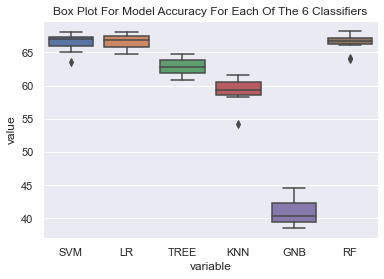

In [204]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_accuracy))
plt.title('Box Plot For Model Accuracy For Each Of The 6 Classifiers')

The cross-validated accuracy scores for the Decision Tree classifier, Gaussian Naive Bayes and k-NN underperformed significantly.  

We will **discard** these models and focus our attention on SVM, logistic regression and Random Forest classifier.

The remaining three models have an overall accuracy of around 66%. The Random Forest classifier exhibits the **smallest variation** in performance and **highest** average score accross the **10 folds**.

Let us take a closer look at the Random Forest result.  The average accuracy score was 66.4%.  The standard deviation of the sample of 10 trials was 0.022538.  The number of trials was 10.  The upper (100 - 95)/2 = 2.5% critical value for the t-distribution with 9 degrees of freedom is 2.262.  So our **95% percent confidence interval** on this result is **66.4% +/- 3%**.

##### For **imbalanced** datasets such as ours, overall accuracy score is not always an appropriate measure.  If an overwhelming number of examples are from one class even poor models can achieve high accuracy scores. 

The distribution of labels for financial service use in the dataset is as follows:

In [208]:
df_train.groupby(['MM_Use']).count()[['Age_scaled']]

,Age_scaled
MM_Use,
0,1384
1,1775
2,802
3,3124


We see from the table that **'Mm_plus'** dominates, followed by **'Other_only'**.

Plot **confusion matrices** to do a further analysis of the results for the reduced set of 3 models.

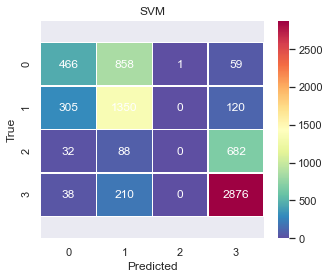

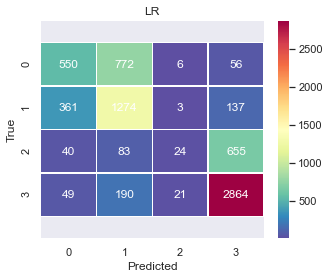

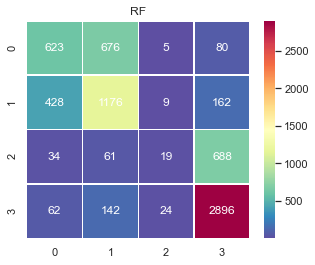

In [212]:
from sklearn.model_selection import cross_val_predict
models = {'SVM': svm_clf_kfold, 'LR':lr_clf_kfold, 'RF': rf_clf_kfold} 

report = []
for k,v in models.items():
    y_pred = cross_val_predict(v,features,labels,cv=kfold)
    cf_matrix = confusion_matrix(labels, y_pred)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set(xlabel='Predicted', ylabel='True')
    plt.figure(k, figsize=(5,4))
    plt.title(k)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.ylim(-2, 4.5)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Spectral_r', linewidths=.5, fmt="", annot_kws={'color':"white"})
    report.append(metrics.classification_report(labels, y_pred, digits=3))

Next, let's examine the **classification reports**.

In [213]:
j = 0
models = ['SVM', 'LR', 'RF']
for i in report:
    print(models[j])
    j += 1
    print(i)

SVM
              precision    recall  f1-score   support

           0      0.554     0.337     0.419      1384
           1      0.539     0.761     0.631      1775
           2      0.000     0.000     0.000       802
           3      0.770     0.921     0.838      3124

    accuracy                          0.662      7085
   macro avg      0.466     0.504     0.472      7085
weighted avg      0.583     0.662     0.609      7085

LR
              precision    recall  f1-score   support

           0      0.550     0.397     0.461      1384
           1      0.549     0.718     0.622      1775
           2      0.444     0.030     0.056       802
           3      0.772     0.917     0.838      3124

    accuracy                          0.665      7085
   macro avg      0.579     0.515     0.494      7085
weighted avg      0.636     0.665     0.622      7085

RF
              precision    recall  f1-score   support

           0      0.543     0.450     0.492      1384
           

Precision for the Mm_only category (the proportion of respondents correctly classified as Mm_only as a fraction of all Mm_only classifications) is low for all three classifiers.  The logistic regression classifier has highest precision at 43%.

Recall for Mm_only (proporation of respondents correctly classified as Mm_only as a fraction of all Mm_only respondents) is very low.  This is because each of the classifiers makes very few Mm_only predictions. SVM is an extreme case where there is only one Mm_only prediction, which is incorrectly classified.  

In all cases, the classifiers tend to incorrectly classify 'Mm_only' respondents as 'Mm_plus'.

Precision for 'No_financial_services' is roughly the same for all three classifiers - between 54% and 56% of all 'No_financial_services' predictions are correct. 

Recall for 'No_financial_services' tends to be lower - between 31% and 47% - primarily due to the tendency all three models to misclassify the majority of 'No_financial_services' respondents as 'Other_only'.

Recall for 'Other_only' is relatively higher for SVM (76%) due to a weaker tendency to misclassify 'No_financial_services' as 'Other_only' *relative* to the other models.  The models are good at distinguishing between the 'Other_only' and the 'MM_only' and 'MM_plus" categories.

Precision and recall for 'Mm_plus' is far higher for all three classifiers (76% and 93% respectively for Random Forest) .

These results show that all three models are **very biased** in favor of the **majority class labels**.

Interestingly, setting **class-weights** to **'balanced'** to introduce some bias during training in favour of 'No_financial_services' and 'Mm_only'<sup>6</sup> **significantly degraded performance** for all of the classifiers.

Another way to improve performance would be by re-sampling the dataset to make it more balanced by **up-sampling 'Mm_only'** and **'No_financial_services'**.  

The severity of the bias from a business standpoint will ultimately depend on the business use case and constraints such as risk appetite.  For example if the aim is to offer attractive loan packages and statistics show that one group, e.g. 'Other_only', are good payers then precision aims not to mistakenly offer packages to individuals in other groups, while recall aims not to miss out on too many good payers.

Try **hyper-parameter tuning** on the SVM model using GridSearch to find out if any improvement is possible.

In [214]:
from sklearn.model_selection import GridSearchCV

p = [{'C': [0.1,0.25,0.5,0.7,1], 'kernel': ['rbf','linear'], 'gamma':[1,0.5,0.1,0.01,0.05]}]

gs = GridSearchCV(estimator = svm_clf, param_grid = p, scoring = 'accuracy', cv = 10, n_jobs = -1, iid=True)

grid_search = gs.fit(features, labels.values.ravel())
grid_search

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), iid=True, n_jobs=-1,
             param_grid=[{'C': [0.1, 0.25, 0.5, 0.7, 1],
                          'gamma': [1, 0.5, 0.1, 0.01, 0.05],
                          'kernel': ['rbf', 'linear']}],
             scoring='accuracy')

In [215]:
optimal_params = grid_search.best_params_
optimal_params

{'C': 0.7, 'gamma': 1, 'kernel': 'linear'}

In [216]:
best_performance = grid_search.best_score_
best_performance

0.6653493295695131

Next, try **hyper-parameter tuning** on the Random Forest classifier.

First, let's inspect the default params

In [217]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [225]:
from sklearn.model_selection import GridSearchCV

p = {
    'bootstrap': [True],
    'max_depth': [30, 50],
    'max_features': [4, 6],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 6],
    'n_estimators': [200, 300],
    'class_weight': [None]
}

gs = GridSearchCV(estimator = rf_clf, param_grid = p, scoring = 'accuracy', cv = 10, n_jobs = -1, iid=True)

grid_search = gs.fit(features, labels.values.ravel())
grid_search

GridSearchCV(cv=10, estimator=RandomForestClassifier(), iid=True, n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': [None],
                         'max_depth': [30, 50], 'max_features': [4, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [200, 300]},
             scoring='accuracy')

In [226]:
optimal_params = grid_search.best_params_
optimal_params

{'bootstrap': True,
 'class_weight': None,
 'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [227]:
best_performance = grid_search.best_score_
best_performance

0.6724064925899789

In [228]:
best_std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

In [229]:
best_std

0.013815921976831303

Gridsearch improved overall accuracy for the Random Forest classifier by about **0.8%** to **67.2%** with no change in standard deviation.

##### From these results, it appears that any substantial model improvement will only be achieved through additional **feature engineering**.

## 4. Implementation (optional)

If you are implementing your solution (deploying the models), how are you doing it?

[Back to top](#Table-of-contents)

## Conclusion

The purpose of this project was to develop a framework to predict the level of financial inclusion among a sample of survey respondents in Tanzania based on socio-economic, demographic and spatial data.  In the experiments conducted Logistic regression, Support Vector Machines and Random Forest classifiers were built to classify individuals into one of four mutually exclusive categories representing varying levels of financial inclusion. All of the models outperformed the **zero rule** with an average accuracy score of approximately 66% with a maximum variability in score of about 3%.  Random Forest classifiers exhibited the lowest variation in score.  

Important drivers of the level of financial inclusion were identified with the most prominent being **recency and frequency of financial transactions** by respondents, the **level of formal education achieved**, **mobile phone ownership** and **regional location**.  All of the models exhibited significant bias toward respondents in the majority categories, with low recall for respondents in the minority categories, particularly respondents who only used mobile money products. This was due to the fact that the dataset of survey respondents was imbalanced.  

Overall, the results of the project demonstrate the tremendous potential for the use of machine learning to improve outcomes for various participants in the financial ecosystem, including MNO's, banks and micro-lenders by refining customer targeting and cross-selling and government agencies by formulated more targeted policies. Future work includes enhanced feature engineering including exploring principal compenent analysis ('PCA') for dimensionality reduction and formulating strategies to mitigate the effects of imbalances during the model induction process.

[Back to top](#Table-of-contents)

## References

1. The Mobile Economy Sub-Saharan Africa 2019. *GSMA*. 

2. Sy, Amadou N. R. 2019. Fintech in Sub-Saharan Africa: A Potential Game Changer. *IMFBlog Insights And Analysis On Economics And Finance*.

3. Digital Access: The Future Of Financial Inclusion In Africa. *International Finance Corporation*

4. Ngugi, Brian. 2020. Safaricom To Launch Unit Trust, New Savings Service. *Business Daily Africa*.

5. Finscope Tanzania 2017. 

2. Nabi, Javaid. 2018. Machine Learning — Multiclass Classification with Imbalanced Dataset. *Medium* 

[Back to top](#Table-of-contents)